# Transformer（上）

**0 前言**<br>
&nbsp;&nbsp;&nbsp;&nbsp;0.1 Transformer模型的地位与发展历程<br>
&nbsp;&nbsp;&nbsp;&nbsp;0.2 序列模型的基本思路与根本诉求<br>

**1 注意力机制**<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.1 注意力机制的本质<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.2 Transformer中的自注意力机制运算流程<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.3 Multi-Head Attention 多头注意力机制<br>

**2 Transformer的基本结构**<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Embedding层与位置编码技术<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Encoder结构解析<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1 残差连接<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2 Layer Normalization层归一化<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3 Feed-Forward Networks前馈网络<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.3 Decoder结构解析<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.1 完整Transformer与Decoder-Only结构的数据流<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2 Encoder-Decoder结构中的Decoder<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.1 输入与teacher forcing<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.2 掩码注意力机制<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.3 普通掩码与前馈掩码<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2.4 编码器-解码器注意力层<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.3 Decoder-Only结构中的Decoder<br>

===================以下内容见Transformer（下）=====================

**3 Transformer的PyTorch实战**<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.1 PyTorch中的Transformer层<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Encoder-Only任务下的Trnasformer实战<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1 Encoder-Only任务下的Transformer架构<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1.1 Embedding层与Encoder数据输入<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1.2 位置编码的实现与技巧<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1.3 从0实现编码器Only架构<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.2 【实战】Transformer的情感分类案例<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.3 Decoder-Only任务下的Trnasformer实战<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.1 数据导入与数据预处理<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.2 Decoder-Only Transformer的架构<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.3 生成式算法的预测与训练<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.4 生成式模型的改进<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.4 Huggingface入门与调用<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.1 Huggingface入门与官网使用指南<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.2 加载并使用预训练模型<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.3 词嵌入工具与词嵌入模型<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.4 全流程自动化的Pipelines工具<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4.5 Huggingface中的模型微调<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.4 【实战】Transformer的机器翻译案例<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.5 【实战】Transformer的时间序列案例<br>

Transformer模型，作为自然语言处理（NLP）领域的一块重要里程碑，于2017年由Google的研究者们提出，现在成为深度学习中对文本和语言数据处理具有根本性影响的架构之一。在NLP的宇宙中，如果说RNN、LSTM等神经网络创造了“序列记忆”的能力，那么Transformer则彻底颠覆了这种“记忆”的处理方式——它放弃了传统的顺序操作，而是通过自注意力机制（Self-Attention），赋予模型一种全新的、并行化的信息理解和处理方式。从自注意力的直观概念出发，Transformer的设计者们引进了多头注意力（Multi-Head Attention）、位置编码（Positional Encoding）等创新元素，大幅度提升了模型处理序列数据的效率和效果。通过精巧的数学构建和模型设计，Transformer能够同时捕捉序列中的局部细节和全局上下文，解决了以往模型在长距离依赖上的困难，使其在处理长文本序列时的能力大大增强。

经过几年的快速迭代，Transformer不仅优化了其原始架构，而且催生了一系列高效的后续模型如BERT、GPT-3、RoBERTa和T5等，这些模型在语言理解、文本生成等多种NLP任务上都取得了令人瞩目的成绩。如同LSTM在其领域内的长久影响一样，Transformer模型的论文和原理也成为了NLP领域的经典，而它本身的算法和架构也已成为当代处理语言数据的根基。今天，尽管存在多种高级的算法和模型，Transformer仍然是处理复杂语言模式、捕捉细腻语义的主流架构，它在多个维度上重塑了我们构建和理解语言模型的方式。现在，就让我们一起来探讨这一划时代结构背后的深邃原理。

## 1 Transformer模型的地位与发展历程

学习Transformer并不只是学习一个算法，而是学习以Transformer为核心的一整个、基于注意力机制的大体系。在NLP领域中，有这样一张著名的树状图，它展示了从2018年到2023年的各种基于Transformer架构的语言模型的发展历程，并将模型从“开源/闭源”、“encoder/decoder/encoder-decoder”以及开发公司三个维度进行了划分。这个演化树很好地概述了从2018年到2023年基于Transformer架构的模型的发展脉络，让我们一步步来解读这个发展历史。

![32](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/32.png)

- 2018年：Transformer的早期探索
> ELMo（Embeddings from Language Models）和ULMFiT（Universal Language Model Fine-tuning）虽然不是基于Transformer架构的，但它们引入了深层双向表示和迁移学习的概念，这对后来的Transformer模型产生了重要影响。

- 2019年：BERT及其衍生模型
> BERT（Bidirectional Encoder Representations from Transformers）是一个重要的里程碑，它通过自注意力机制（self-attention）使模型能够生成上下文相关的词向量。它是首个大规模双向Transformer模型，对后续的模型产生了深远影响。
> RoBERTa 对BERT进行了改进，通过更大的数据集和更长的训练时间提高了性能。
> ALBERT 旨在减少模型大小的同时保持性能，通过因子分解嵌入层和跨层参数共享实现。

- 2020年：多样化的模型和架构
> T5（text-to-text Transfer Transformer）将所有文本问题转化为文本到文本的格式，这样可以用相同的模型处理不同的任务。
> BART（Bidirectional and Auto-Regressive Transformers）结合了自编码和自回归的特点，适用于序列生成任务。

- 2021年：专门化与效率优化
> ELECTRA 通过对抗性训练和效率优化来提高模型性能。
> DeBERTa 引入了改进的注意力机制，提高了模型对词之间关系的理解。

- 2022年：大型语言模型的崛起
> GPT-3（Generative Pre-trained Transformer 3）以其庞大的参数量和强大的生成能力成为当时最大的语言模型之一。
> Switch-C（Switch Transformers）采用了稀疏激活，允许模型扩展到非常大的尺寸而不显著增加计算成本。

- 2023年：高级应用与细化模型
> ChatGPT 和 InstructGPT 是在GPT-3基础上针对特定应用，如聊天和指令性任务，进行了优化的模型。
> Chinchilla 和 Gopher 表示了更高级别的语言理解和生成能力。
> FLAN 和 mT5 针对多语言任务设计，显示了模型的国际化和多样化发展。

这个演化树还展示了各个模型之间的继承关系，以及它们是否开源。模型的不断迭代和创新反映了这个领域对于理解和生成人类语言能力的不断追求。每一代模型都在数据处理能力、训练方法、应用范围以及解决特定问题的能力上做出了改进。这一进程不仅推动了NLP的边界，也为人工智能的其他领域提供了宝贵的见解。

当我们踏上学习Transformer的旅程时，实际上是在拥抱一个基于注意力机制的庞大而复杂的知识体系，这远远超出了单一算法的学习。Transformer及其衍生的模型不仅仅是NLP领域的工具，更是一扇窗口，透过它我们可以观察和理解语言的深层结构和流动的信息。这一体系以其独特的处理方式——自注意力机制——为核心，它挑战了传统的序列处理观念，引领我们探索如何让机器更深入地理解文本之间的复杂关系。从Transformer的基本架构到各种先进的变体，如BERT、GPT-3等，我们将学习如何让机器通过这些模型捕捉到词与词之间的微妙联系，理解语境的全局连贯性，以及如何将这些理解转化为处理多样化任务的能力。通过学习Transformer，我们不只是在掌握一种技术，更是在探索一个不断发展的领域，这个领域正推动着人工智能的边界，塑造着未来。所以，让我们开启这一段学习之旅，不仅为了掌握一个算法，更为了深入理解这个基于注意力的丰富体系，发现其在语言、思想和技术交汇处的无限可能。

## 2 序列模型的基本思路与根本诉求

要理解Transformer模型的本质，首先我们要回归到序列数据、序列模型这些基本概念上来。序列数据是一种按照特定顺序排列的数据，它在现实世界中无处不在，例如股票价格的历史记录、语音信号、文本数据、视频数据等等，主要是按照某种特定顺序排列、且该顺序不能轻易被打乱的数据都被称之为是序列数据。序列数据有着“样本与样本有关联”的特点；对时间序列数据而言，每个样本就是一个时间点，因此样本与样本之间的关联就是时间点与时间点之间的关联。对文字数据而言，每个样本就是一个字/一个词，因此样本与样本之间的关联就是字与字之间、词与词之间的语义关联。很显然，要理解一个时间序列的规律、要理解一个完整的句子所表达的含义，就必须要理解样本与样本之间的关系。

对于一般表格类数据，我们一般重点研究特征与标签之间的关联，但**在序列数据中，众多的本质规律与底层逻辑都隐藏在其样本与样本之间的关联中**，这让序列数据无法适用于一般的机器学习与深度学习算法。这是我们要创造专门处理序列数据的算法的根本原因。在深度学习与机器学习的世界中，**序列算法的根本诉求是要建立样本与样本之间的关联，并借助这种关联提炼出对序列数据的理解**。唯有找出样本与样本之间的关联、建立起样本与样本之间的根本联系，序列模型才能够对序列数据实现分析、理解和预测。

在机器学习和深度学习的世界当中，存在众多经典且有效的序列模型。这些模型通过如下的方式来建立样本与样本之间的关联——

- ARIMA家族算法群
> 过去影响未来，因此未来的值由过去的值加权求和而成，以此构建样本与样本之间的关联。

$$AR模型：y_t = c + w_1 y_{t-1} + w_2 y_{t-2} + \dots + w_p y_{t-p} + \varepsilon_t
$$

- 循环网络家族
> 遍历时间点/样本点，将过去的时间上的信息传递存储在中间变量中，传递给下一个时间点，以此构建样本和样本之间的关联。

$$RNN模型：h_t = W_{xh}\cdot x_t + W_{hh}\cdot h_{t-1}$$

$$LSTM模型：\tilde{C}_t = tanh(W_{xi} \cdot x_t + W_{hi} \cdot h_{t-1} + b_i)$$

- 卷积网络家族
> 使用卷积核扫描时间点/样本点，将上下文信息通过卷积计算整合到一起，以此构建样本和样本之间的关联。如下图所示，蓝绿色方框中携带权重$w$，权重与样本值对应位置元素相乘相加后生成标量，这是一个加权求和过程。

![04](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/1dcnn/04.gif)

总结众多序列架构的经验，你会发现**成功的序列架构都在使用加权求和的方式来建立样本与样本之间的关联**，通过对不同时间点/不同样本点上的值进行加权求和，可以轻松构建“上下文信息的复合表示”，只要尝试着使用迭代的方式求解对样本进行加权求和的权重，就可以使算法获得对序列数据的理解。加权求和是有效的样本关联建立方式，这在整个序列算法研究领域几乎已经形成了共识。**在序列算法发展过程中，核心的问题已经由“如何建立样本之间的关联”转变为了“如何合理地对样本进行加权求和、即如何合理地求解样本加权求和过程中的权重”**。在这个问题上，Transformer给出了序列算法研究领域目前为止最完美的答案之一——**Attention is all you need，最佳权重计算方式是注意力机制**。

## 1.1 注意力机制的本质

注意力机制是一个帮助算法辨别信息重要性的计算流程，它通过计算样本与样本之间相关性来判断**每个样本之于一个序列的重要程度**，并**给这些样本赋予能代表其重要性的权重**。很显然，注意力机制能够为样本赋予权重的属性与序列模型研究领域的追求完美匹配，Transformer正是利用了注意力机制的这一特点，从而想到利用注意力机制来进行权重的计算。

> **面试考点**<br><br>
作为一种权重计算机制、注意力机制有多种实现形式。经典的注意力机制（Attention）进行的是跨序列的样本相关性计算，这是说，经典注意力机制考虑的是序列A的样本之于序列B的重要程度。这种形式常常用于经典的序列到序列的任务（Seq2Seq），比如机器翻译；在机器翻译场景中，我们会考虑原始语言系列中的样本对于新生成的序列有多大的影响，因此计算的是原始序列的样本之于新序列的重要程度。
<br><br>不过在Transformer当中我们使用的是“自注意力机制”（Self-Attention），这是在一个序列内部对样本进行相关性计算的方式，核心考虑的是序列A的样本之于序列A本身的重要程度。

在Transformer架构中我们所使用的是自注意力机制，因此我们将重点围绕自注意力机制来展开讨论，我们将一步步揭开自注意力机制对于Transformer和序列算法的意义——

- 首先，**为什么要判断序列中样本的重要性？计算重要性对于序列理解来说有什么意义？**

在序列数据当中，每个样本对于“理解序列”所做出的贡献是不相同的，能够帮助我们理解序列数据含义的样本更为重要，而对序列数据的本质逻辑/含义影响不大的样本则不那么重要。以文字数据为例——

**<center>尽管今天<font color ="green">下了雨</font>，但我因为<font color ="red">_________</font>而感到<font color ="red">非常开心和兴奋</font>。</center>**

**<center>__________</font>，但我因为拿到了<font color ="red">梦寐以求的工作offer</font>而感到<font color ="red">非常开心和兴奋</font>。</center>**

观察上面两句话，我们分别抠除了一些关键信息。很显然，第一个句子令我们完全茫然，但第二个句子虽然缺失了部分信息，但我们依然理解事情的来龙去脉。从这两个句子我们明显可以看出，不同的信息对于句子的理解有不同的意义。

在实际的深度学习预测任务当中也是如此，假设我们依然以这个句子为例——

**<center>尽管今天<font color ="green">下了雨</font>，但我因为拿到了<font color ="red">梦寐以求的工作offer</font>而感到<font color ="red">非常开心和兴奋</font>。</center>**

假设模型对句子进行情感分析，很显然整个句子的情感倾向是积极的，在这种情况下，“下了雨”这一部分对于理解整个句子的情感色彩贡献较小，相对来说，“拿到了梦寐以求的工作offer”和“感到非常开心和兴奋”这些部分则是理解句子传达的正面情绪的关键。因此对序列算法来说，如果更多地学习“拿到了梦寐以求的工作offer”和“感到非常开心和兴奋”这些词，就更有可能对整个句子的情感倾向做出正确的理解，就更有可能做出正确的预测。

当我们使用注意力机制来分析这样的句子时，自注意力机制可能会为“开心”和“兴奋”这样的词分配更高的权重，因为这些词直接关联到句子的情感倾向。在很长一段时间内、长序列的理解都是深度学习世界的业界难题，在众多研究当中研究者们尝试着从记忆、效率、信息筛选等等方面来寻找出路，而注意力机制所走的就是一条“提效”的道路。**如果我们能够判断出一个序列中哪些样本是重要的、哪些是无关紧要的，就可以引导算法去重点学习更重要的样本，从而可能提升模型的效率和理解能力**。

- 第二，**那样本的重要性是如何定义的？为什么？**

自注意力机制通过**计算样本与样本之间的相关性**来判断样本的重要性，在一个序列当中，如果一个样本与其他许多样本都高度相关，则这个样本大概率会对整体的序列有重大的影响。举例说明，看下面的文字——

**<center>经理在会议上宣布了重大的公司<font color ="red">______</font>计划，员工们反应各异，但都对未来充满期待。</center>**

在这个例子中，我们抠除的这个词与“公司”、“计划”、“会议”、“宣布”和“未来”等词汇都高度相关。如果我们针对这些词汇进行提问，你会发现——

**公司**做了什么？<br>
**宣布**了什么内容？<br>
**计划**是什么？<br>
**未来**会发生什么？<br>
**会议**上的主要内容是什么？

所有这些问题的答案都围绕着这一个被抠除的词产生。这个完整的句子是——

**<center>经理在会议上宣布了重大的公司<font color ="red">重组</font>计划，员工们反应各异，但都对未来充满期待。</center>**

被抠掉的部分是**重组**。很明显，重组这个词不仅提示了事件的性质、是整个句子的关键，而且也对其他词语的理解有着重大的影响。这个单词对于理解句子中的事件——公司正在经历重大变革，以及员工们的情绪反应——都至关重要。如果没有“重组”这个词，整个句子的意义将变得模糊和不明确，因为不再清楚“宣布了什么”以及“未来期待”是指什么。因此，“重组”这个词很明显对整个句子的理解有重大影响，而且它也和句子中的其他词语高度相关。

相对的，假设我们抠掉的是——

**<center>经理在会议上宣布了重大的公司<font color ="red">重组</font>计划，______反应各异，但都对未来充满期待。</center>**

你会发现，虽然我们缺失了一些信息，但实际上这个信息并不太影响对于整体句子的理解，我们甚至可以大致推断出缺失的信息部分。这样的规律可以被推广到许多序列数据上，在序列数据中我们认为**与其他样本高度相关的样本，大概率会对序列整体的理解有重大影响。因此样本与样本之间的相关性可以用来衡量一个样本对于序列整体的重要性**。

- 第三，**样本的重要性（既一个样本与其他样本之间的相关性）具体是如何计算的？**

在NLP的世界中，序列数据中的每个样本都会被编码成一个向量，其中文字数据被编码后的结果被称为词向量，时间序列数据则被编码为时序向量。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/Live/NLP%26LLMs/06_.png)

因此，要计算样本与样本之间的相关性，本质就是计算向量与向量之间的相关性。**向量的相关性可以由两个向量的点积来衡量**。如果两个向量完全相同方向（夹角为0度），它们的点积最大，这表示两个向量完全正相关；如果它们方向完全相反（夹角为180度），点积是一个最大负数，表示两个向量完全负相关；如果它们垂直（夹角为90度或270度），则点积为零，表示这两个向量是不相关的。因此，向量的点积值的绝对值越大，则表示两个向量之间的相关性越强，如果向量的点积值绝对值越接近0，则说明两个向量相关性越弱。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/18.png)

向量的点积就是两个向量相乘的过程，设有两个三维向量$\mathbf{A}$ 和 $\mathbf{B}$，则向量他们之间的点积可以具体可以表示为：

$$
\mathbf{A} \cdot \mathbf{B}^T = \begin{pmatrix}
a_1, a_2, a_3
\end{pmatrix} \cdot
\begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix} = a_1 \cdot b_1 + a_2 \cdot b_2 + a_3 \cdot b_3
$$

相乘的结构为(1,3) y (3,1) = (1,1)，最终得到一个标量。

在NLP的世界当中，我们所拿到的词向量数据或时间序列数据一定是具有多个样本的。我们需要求解**样本与样本两两之间的相关性**，综合该相关性分数，我们才能够计算出一个样本对于整个序列的重要性。在这里需要注意的是，在NLP的领域中，样本与样本之间的相关性计算、即向量的之间的相关性计算会受到向量顺序的影响。**这是说，以一个单词为核心来计算相关性，和以另一个单词为核心来计算相关性，会得出不同的相关程度，向量之间的相关性与顺序有关**。举例说明：

假设我们有这样一个句子：**我爱小猫咪。**

> - 如果以"我"字作为核心词，计算“我”与该句子中其他词语的相关性，那么"爱"和"小猫咪"在这个上下文中都非常重要。"爱"告诉我们"我"对"小猫咪"的感情是什么，而"小猫咪"是"我"的感情对象。这个时候，"爱"和"小猫咪"与"我"这个词的相关性就很大。

> - 但是，如果我们以"小猫咪"作为核心词，计算“小猫咪”与该剧自中其他词语的相关性，那么"我"的重要性就没有那么大了。因为不论是谁爱小猫咪，都不会改变"小猫咪"本身。这个时候，"小猫咪"对"我"这个词的上下文重要性就相对较小。

当我们考虑更长的上下文时，这个特点会变得更加显著：

> - 我爱小猫咪，但妈妈并不喜欢小猫咪。

此时对猫咪这个词来说，谁喜欢它就非常重要。

> - 我爱小猫咪，小猫咪非常柔软。

此时对猫咪这个词来说，到底是谁喜欢它就不是那么重要了，关键是它因为柔软的属性而受人喜爱。

因此，假设数据中存在A和B两个样本，则我们必须计算AB、AA、BA、BB四组相关性才可以。在每次计算相关性时，作为核心词的那个词被认为是在“询问”（Question），而作为非核心的词的那个词被认为是在“应答”（Key），AB之间的相关性就是A询问、B应答的结果，AA之间的相关性就是A向自己询问、A自己应答的结果。

这个过程可以通过矩阵的乘法来完成。假设现在我们的向量中有2个样本（A与B），每个样本被编码为了拥有4个特征的词向量。如下所示，如果我们要计算A、B两个向量之间的相关性，只需要让特征矩阵与其转置矩阵做点积就可以了——

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/19.png)

上述点积结果得到的最终矩阵是：

$$\begin{bmatrix}
r_{AA} & r_{AB}  \\
r_{BA}  & r_{BB} 
\end{bmatrix}$$

该乘法规律可以推广到任意维度的数据上，如果是带有3个样本的序列与自身的转置相乘，就会得到3y3结构的相关性矩阵，如果是n个样本的序列与自身的转置相乘，就会得到nyn结构的相关性矩阵，这些相关性矩阵代表着**这一序列当中每个样本与其他样本之间的相关性**，相关系数的个数、以及相关性矩阵的结构只与样本的数量有关，与样本的特征维度无关。因此面对任意的数据，我们只需要让该数据与自身的转置矩阵相乘，就可以自然得到**这一序列当中每个样本与其他样本之间的相关性**构成的相关性矩阵了。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/Live/NLP%26LLMs/06_.png)

当然，在实际计算相关性的时候，我们一般不会直接使用原始特征矩阵并让它与转置矩阵相乘，**因为我们渴望得到的是语义的相关性，而非单纯数字上的相关性**。因此在NLP中使用注意力机制的时候，**我们往往会先在原始特征矩阵的基础上乘以一个解读语义的$w$参数矩阵，以生成用于询问的矩阵Q、用于应答的矩阵K以及其他可能有用的矩阵**。

在实际进行运算时，$w$是神经网络的参数，是由迭代获得的，因此$w$会依据损失函数的需求不断对原始特征矩阵进行语义解读，而我们实际的相关性计算是在矩阵Q和K之间运行的。使用Q和K求解出相关性分数的过程，就是自注意力机制的核心过程，如下图所示 ↓

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/Live/NLP%26LLMs/2-2.png)

到这里，我们已经将自注意力机制的内容梳理完毕了。

## 1.2 Transformer中的自注意力机制运算流程

现在我们知道注意力机制是如何运行的了，在Transformer当中我们具体是如何使用自注意力机制为样本增加权重的呢？来看下面的流程。

**Step1：通过词向量得到QK矩阵**

首先，transformer当中计算的相关性被称之为是**注意力分数**，该注意力分数是在原始的注意力机制上修改后而获得的全新计算方式，其具体计算公式如下——

$$Attention(Q,K,V) = softmax(\frac{QK^{T}}{\sqrt{d_k}})V$$

在这个公式中，首先我们要先将原始特征矩阵转化为Q和K，然后令Q乘以K的转置，以获得最基础的相关性分数。同时，我们计算出权重之后，还需要将权重乘在样本上，以构成“上下文的复合表示”，因此我们还需要在原始特征矩阵基础上转化处矩阵V，用于表示原始特征所携带的信息值。假设现在我们有4个单词，每个单词被编码成了6列的词向量，那计算Q、K、V的过程如下所示：

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/Live/NLP%26LLMs/2-2.png)

其中的$W_Q$与$W_K$的结构都为（6,3），事实上我们值需要保证这两个参数矩阵能够与$y$相乘即可（即这两个参数矩阵的行数与y被编码的列数相同即可），在现代大部分的应用当中，一般$W_Q$与$W_K$都是正方形的结构。

**Step2：计算$QK$相似度，得到相关性矩阵**

接下来我们让Q和K的转置相乘，计算出相关性矩阵。

$$Attention(Q,K,V) = softmax(\frac{QK^{T}}{\sqrt{d_k}})V$$

$QK^{T}$的过程中，点积是相乘后相加的计算流程，因此词向量的维度越高、点积中相加的项也就会越多，因此点积就会越大。此时，词向量的维度对于相关性分数是有影响的，在两个序列的实际相关程度一致的情况下，词向量的特征维度高更可能诞生巨大的相关性分数，因此对相关性分数需要进行标准化。在这里，Transformer为相关性矩阵设置了除以$\sqrt{d_k}$的标准化流程，$d_k$就是特征的维度，以上面的假设为例，$d_k$=6。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/Live/NLP%26LLMs/2-3.png)

**Step3：softmax函数归一化**

将每个单词之间的相关性向量转换成[0,1]之间的概率分布。例如，对AB两个样本我们会求解出AA、AB、BB、BA四个相关性，经过softmax函数的转化，可以让AA+AB的总和为1，可以让BB+BA的总和为1。这个操作可以令一个样本的相关性总和为1，从而将相关性分数转化成性质上更接近“权重”的[0,1]之间的比例。这样做也可以控制相关性分数整体的大小，避免产生数字过大的问题。

经过softmax归一化之后的分数，就是注意力机制求解出的**权重**。

**Step4：对样本进行加权求和，建立样本与样本之间的关系**

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-11.png)

现在我们已经获得了softmax之后的分数矩阵，同时我们还有代表原始特征矩阵值的V矩阵——

$$
\mathbf{r} = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix},
\quad
\mathbf{V} = \begin{pmatrix}
v_{11} & v_{12} & v_{13} \\
v_{21} & v_{22} & v_{23}
\end{pmatrix}
$$
二者相乘的结果如下：

$$
\mathbf{Z(Attention)} = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
v_{11} & v_{12} & v_{13} \\
v_{21} & v_{22} & v_{23}
\end{pmatrix}
= \begin{pmatrix}
(a_{11}v_{11} + a_{12}v_{21}) & (a_{11}v_{12} + a_{12}v_{22}) & (a_{11}v_{13} + a_{12}v_{23}) \\
(a_{21}v_{11} + a_{22}v_{21}) & (a_{21}v_{12} + a_{22}v_{22}) & (a_{21}v_{13} + a_{22}v_{23})
\end{pmatrix}
$$

观察最终得出的结果，式子$a_{11}v_{11} + a_{12}v_{21}$不正是$v_{11}$和$v_{21}$的加权求和结果吗？$v_{11}$和$v_{21}$正对应着原始特征矩阵当中的第一个样本的第一个特征、以及第二个样本的第一个特征，这两个v之间加权求和所建立的关联，正是两个样本之间、两个时间步之间所建立的关联。

在这个计算过程中，需要注意的是，列脚标与权重无关。因为整个注意力得分矩阵与特征数量并无关联，因此在乘以矩阵$v$的过程中，矩阵$r$其实并不关心一行上有多少个$v$，它只关心这是哪一行的v。因此我们可以把Attention写成：

$$
\mathbf{Z(Attention)} = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
v_{11} & v_{12} & v_{13} \\
v_{21} & v_{22} & v_{23}
\end{pmatrix}
= \begin{pmatrix}
(a_{11}v_{1} + a_{12}v_{2}) & (a_{11}v_{1} + a_{12}v_{2}) & (a_{11}v_{1} + a_{12}v_{2}) \\
(a_{21}v_{1} + a_{22}v_{2}) & (a_{21}v_{1} + a_{22}v_{2}) & (a_{21}v_{1} + a_{22}v_{2})
\end{pmatrix}
$$

很显然，对于矩阵$a$而言，原始数据有多少个特征并不重要，它始终都在建立样本1与样本2之间的联系。

## 1.3 Multi-Head Attention 多头注意力机制

Multi-Head Attention 就是在self-attention的基础上，对于输入的embedding矩阵，self-attention只使用了一组$W^Q,W^K,W^V$ 来进行变换得到Query，Keys，Values。而Multi-Head Attention使用多组$W^Q,W^K,W^V$  得到多组Query，Keys，Values，然后每组分别计算得到一个Z矩阵，最后将得到的多个Z矩阵进行拼接。Transformer原论文里面是使用了8组不同的$W^Q,W^K,W^V$  。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-12.png)

假设每个头的输出$Z_i$是一个维度为(2,3)的矩阵，如果我们有$h$个注意力头，那么最终的拼接操作会生成一个维度为(2, 3h)的矩阵。

假设有两个注意力头的例子：

1. 头1的输出 $ Z_1 $：
$$
Z_1 = \begin{pmatrix}
z_{11} & z_{12} & z_{13} \\
z_{14} & z_{15} & z_{16}
\end{pmatrix}
$$

2. 头2的输出 $ Z_2 $：
$$
Z_2 = \begin{pmatrix}
z_{21} & z_{22} & z_{23} \\
z_{24} & z_{25} & z_{26}
\end{pmatrix}
$$

3. 拼接操作：
$$
Z_{\text{concatenated}} = \begin{pmatrix}
z_{11} & z_{12} & z_{13} & z_{21} & z_{22} & z_{23} \\
z_{14} & z_{15} & z_{16} & z_{24} & z_{25} & z_{26}
\end{pmatrix}
$$

一般情况：

对于$h$个注意力头，每个头的输出$Z_i$为：

$$
Z_i = \begin{pmatrix}
z_{i1} & z_{i2} & z_{i3} \\
z_{i4} & z_{i5} & z_{i6}
\end{pmatrix}
$$

总拼接操作如下：

$$
Z_{\text{concatenated}} = \begin{pmatrix}
z_{11} & z_{12} & z_{13} & z_{21} & z_{22} & z_{23} & \cdots & z_{h1} & z_{h2} & z_{h3} \\
z_{14} & z_{15} & z_{16} & z_{24} & z_{25} & z_{26} & \cdots & z_{h4} & z_{h5} & z_{h6}
\end{pmatrix}
$$

最终的结构为(2,3h)。因此假设特征矩阵中，序列的长度为100，序列中每个样本的embedding维度为3，并且设置了8头注意力机制，那最终输出的序列就是(100,24)。

![](https://data-science-blog.com/wp-content/uploads/2022/01/mha_img_original.png)

以上就是Transformer当中的自注意力层，Transformer就是在这一根本结构的基础上建立了样本与样本之间的链接。在此结构基础上，Transformer丰富了众多的细节来构成一个完整的架构。让我们现在就来看看Transformer的整体结构。

让我们一起来看看Transformer算法都由哪些元素组成，以下是来自论文《All you need is Attention》的架构图：

<center><img src="https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png" alt="描述文字" width="400">

Transformer的总体架构主要由两大部分构成：编码器（Encoder）和解码器（Decoder）。在Transformer中，编码是解读数据的结构，在NLP的流程中，编码器负责解构自然语言、将自然语言转化为计算机能够理解的信息，并让计算机能够学习数据、理解数据；而解码器是将被解读的信息“还原”回原始数据、或者转化为其他类型数据的结构，它可以让算法处理过的数据还原回“自然语言”，也可以将算法处理过的数据直接输出成某种结果。因此在transformer中，编码器负责接收输入数据、负责提取特征，而解码器负责输出最终的标签。当这个标签是自然语言的时候，解码器负责的是“将被处理后的信息还原回自然语言”，当这个标签是特定的类别或标签的时候，解码器负责的就是“整合信息输出统一结果”。

在信息进入解码器和编码器之前，我们首先要对信息进行**Embedding和Positional Encoding两种编码**，这两种编码在实际代码中表现为两个单独的层，因此这两种编码结构也被认为是Transformer结构的一部分。经过编码后，数据会进入编码器Encoder和解码器decoder，其中编码器是架构图上左侧的部分，解码器是架构图上右侧的部分。

**编码器（Encoder）结构包括两个子层：一个是多头的自注意力（Self-Attention）层，另一个是前馈（Feed-Forward）神经网络**。输入数据会先经过自注意力层，这层的作用是为输入数据中不同的信息赋予重要性的权重、让模型知道哪些信息是关键且重要的。接着，这些信息会经过前馈神经网络层，这是一个简单的全连接神经网络，用于将多头注意力机制中输出的信息进行整合。两个子层都被武装了一个残差连接（Residual Connection），这两个层输出的结果都会有残差链接上的结果相加，再经过一个层标准化（Layer Normalization），才算是得到真正的输出。在神经网络中，多头注意力机制+前馈网络的结构可以有很多层，在Transformer的经典结构中，encoder结构重复了6层。

**解码器（Decoder）也是由多个子层构成的：第一个也是多头的自注意力层（此时由于解码器本身的性质问题，这里的多头注意力层携带掩码），第二个子层是普通的多头注意力机制层，第三个层是前馈神经网络**。自注意力层和前馈神经网络的结构与编码器中的相同。注意力层是用来关注编码器输出的。同样的，每个子层都有一个残差连接和层标准化。在经典的Transformer结构中，Decoder也有6层。

**这个结构看似简单，但其实奥妙无穷，这里有许多的问题等待我们去挖掘和探索**。现在就让我们从解码器部分开始逐一解读transformer结构。

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-1.png" alt="描述文字" width="400">

## 2.1 Embedding层与位置编码技术

在Transformer中，embedding层位于encoder和decoder之前，主要负责进行语义编码。Embedding层将离散的词汇或符号转换为连续的高维向量，使得模型能够处理和学习这些向量的语义关系。通过嵌入表示，输入的序列可以更好地捕捉到词与词之间的相似性和关系。此外，在输入到编码器和解码器之前，通常还会添加位置编码（Positional Encoding），因为Transformer没有内置的序列顺序信息，也就是说Attention机制本身会带来**位置信息的丧失**。

- **首先，位置信息为什么重要？它可以从哪里来？**

首先，位置信息就是顺序的信息，字符排列的顺序会影响语句的理解（还记得“屡战屡败”和“屡败屡战”的例子吗？同样的词在句子不同的地方出现，也可能会有不同的含义），我们说Transformer丧失了位置信息，意思是transformer并不理解样本与样本之间是按照什么顺序排列的（也就是不知道样本在序列中具体的位置）。

还记得RNN和LSTM是如何处理数据的吗？RNN和LSTM以序列的方式处理输入数据，即一个时间步一个时间步地处理输入序列的每个元素。每个时间步的隐藏状态依赖于前一个时间步的隐藏状态。这种机制天然地捕捉了序列的顺序信息。由于RNN和LSTM在处理序列时会保留前一时间步的信息并传递到下一时间步，所以它们能够内在地理解和处理序列的时间依赖关系和顺序信息。然而，与RNN和LSTM不同，Transformer并不以序列的方式逐步处理输入数据，而是一次性处理整个序列。Attention能够通过点积的方式一次性计算出所有向量之间的相关性、并且多头注意力机制中不同的头还可以并行，因此Attention与Transformer缺乏天然的顺序信息。

- **相关性计算过程中有标识，这些标识不能够成为位置信息吗？什么信息才算是位置信息/顺序信息呢？**

在注意力机制中，权重矩阵$softmax(\frac{QK^{T}}{\sqrt{d_k}})$中的每个元素$a_{ij}$表示序列中位置$i$和位置$j$之间的相关性，但是却并没有假设这两个相关的元素之间的位置信息。具体来说，虽然我们使用了1、2这样的脚标，但Attention实际在进行计算的时候，只会认知两个具体的相关性数字，并没有显性地认知到脚标——

$$
\mathbf{Z(Attention)} = \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
v_{11} & v_{12} & v_{13} \\
v_{21} & v_{22} & v_{23}
\end{pmatrix}
= \begin{pmatrix}
(a_{11}v_{11} + a_{12}v_{21}) & (a_{11}v_{12} + a_{12}v_{22}) & (a_{11}v_{13} + a_{12}v_{23}) \\
(a_{21}v_{11} + a_{22}v_{21}) & (a_{21}v_{12} + a_{22}v_{22}) & (a_{21}v_{13} + a_{22}v_{23})
\end{pmatrix}
$$

由于Transformer模型放弃了“逐行对数据进行处理”的方式，而是一次性处理一整张表单，因此它不能直接像循环神经网络RNN那样在训练过程中就捕捉到单词与单词之间的位置信息。在经典的深度学习场景当中，最典型的顺序信息就是**数字的大小**。由于数字天生是带有大小顺序的，因此数字本身可以被认为是含有顺序一个信息，只要让有顺序的信息和有顺序的数字相匹配，就可以让算法天然地认知到相应的顺序。因此我们自然而然地**想要对样本的位置本身进行“编码”**，利用数字本身自带的顺序来告知Transformer。

- **位置信息如何被告知给Attention/Transformer这样的算法？**

为了解决位置信息的问题，Transformer引入了位置编码（positional encoding）技术来补充语义词嵌入。我们首先将样本的位置转变成相应的数字或向量，然后让位置编码的这个向量被加到原有的词嵌入向量embedding向量上，这样模型就可以同时知道一个词的语义和它在句子中的位置。

![Alt text](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-6.png)

（上图中的数字编号有误，无论是embedding、postion encoding还是最终加和的结果，都应该等于512，521是错误的表示）

位置编码使用了一种特殊的函数，这个函数会为序列中的每个位置生成一个向量。对于一个特定的位置，这个函数生成的向量在所有维度上的值都是不同的。这保证了每个位置的编码都是唯一的，而且不同位置的编码能够保持一定的相对关系。**在transformer的位置编码中，我们需要对每个词的每个特征值给与位置编码，所有这些特征位置的编码共同组合成了一个样本的位置编码**。例如，当一个样本拥有4个特征时，我们的位置编码也会是包含4个数字的一个向量，而不是一个单独的编码。因此，**位置编码矩阵是一个与embedding后的矩阵结构相同的矩阵**。

在Transformer模型中，词嵌入和位置编码被相加，然后输入到模型的第一层。这样，Transformer就可以同时处理词语的语义和它在句子中的位置信息。这也是Transformer模型在处理序列数据，特别是自然语言处理任务中表现出色的一个重要原因。

- **Transformer中的正余弦位置编码**

在过去最为经典的位置编码就是OrdinalEncoder顺序编码，但在Transformer中我们需要的是一个编码向量，而非单一的编码数字，因此OrdinalEncoder编码就不能使用了。在众多的、构成编码向量的方式中，Transformer选择了“**正余弦编码**”这一特别的方式。让我们一起来看看正余弦编码的含义——

首先，正余弦编码是使用正弦函数和余弦函数来生成具体编码值的编码方式。对于任意的词向量（也就是数据中的一个样本），正余弦编码在偶数维度上采用了sin函数来编码，奇数维度采用了cos函数来编码，sin函数与cos函数交替使用，最终构成一个多维度的向量——


![Alt text](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-4.png)

通过对不同的维度进行不同的三角函数编码，来构成一串独一无二的编码组合。这种编码组合与embedding类似，都是将信息投射到一个高维空间当中，只不过正余弦编码是将样本的位置信息（也就是样本的索引）投射到高维空间中，且每一个特征的维度代表了这个高维空间中的一维度。对正余弦编码来说，编码数字本身是依赖于**样本的位置信息（索引）、所有维度的编号、以及总维度数三个因子**计算出来的。

具体来看，正余弦编码的公式如下：

- 正弦位置编码（Sinusoidal Positional Encoding）
$$PE_{(pos, 2i)} = \sin \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

- 余弦位置编码（Cosine Positional Encoding）
$$ PE_{(pos, 2i+1)} = \cos \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

将这段LaTey代码粘贴到支持LaTey的环境中（如LaTey编辑器或支持LaTey的Markdown渲染器）即可得到公式的正确显示。

其中——
> - pos代表样本在序列中的位置，也就是样本的索引（是三维度中的seq_len/vocal_size/time_step这个维度上的索引）<br><br>
> - $2i$和$2i+1$分别代表embedding矩阵中的偶数和奇数维度索引，当我们让i从0开始循环增长时，可以获得[0,1,2,3,4,5,6...]这样的序列。<br><br>
> - $d_{\text{model}} $ 代表embedding后矩阵的总维度。

在这里，你可以选择停下脚步、开启下一节课程，你也可以选择继续听更深入的关于位置编码的内容。这里有选择的原因是，位置编码作为深度学习和时间序列处理过程中非常重要的一种技术，在不同的场景下被频繁地使用，我们可以将其用于纹理建模、声音处理、信号处理、震动分析等多种场合，但同时，我们也将它作为一种行业惯例在进行使用，因此你或许无需对正余弦位置编码进行特别深入的探索。

但正余弦位置编码本身是一种非常奇妙的结构，在接下来的内容中，我将带你仔细剖析正余弦位置编码的诸多细节和意义。

- **为什么要使用正余弦编码？它有什么意义？**

- 正弦位置编码（Sinusoidal Positional Encoding）
$$PE_{(pos, 2i)} = \sin \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

- 余弦位置编码（Cosine Positional Encoding）
$$ PE_{(pos, 2i+1)} = \cos \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

首先我们先来看Pos，Pos是样本的索引，它有多大会取决于实际的数据尺寸。如果一个时间序列或文本数据是很长的序列，那Pos数值本身也会变得很大。假设我们使用很大的数值与原本的embedding序列相加，那位置编码带来的影响可能会远远超过原始的语义、会导致喧宾夺主的问题，因此我们天然就有限制位置编码的大小的需求。在这个角度来看，使用sin和cos这样值域很窄的函数、就能够很好地限制位置编码地大小。

**<center>正余弦编码的意义①：sin和cos函数值域有限，可以很好地限制位置编码的数字大小。**

假设我们使用的是单变量序列，那我们或许只需要sin(pos)或者cos(pos)看起来就足够了，但为了给每个不同的维度都进行编码，我们肯定还要做点儿别的文章。首先，位置信息和语义信息一样，当我们将其投射到高维空间时，我们也在尝试用不同的维度来解读位置信息。但我们使用正弦余弦这样的三角函数时，如何能够将信息投射到不同的维度呢——答案是创造各不相同的sin和cos函数。虽然都是正弦/余弦函数，但我们可以为函数设置不同的频率来获得各种高矮胖瘦的函数——

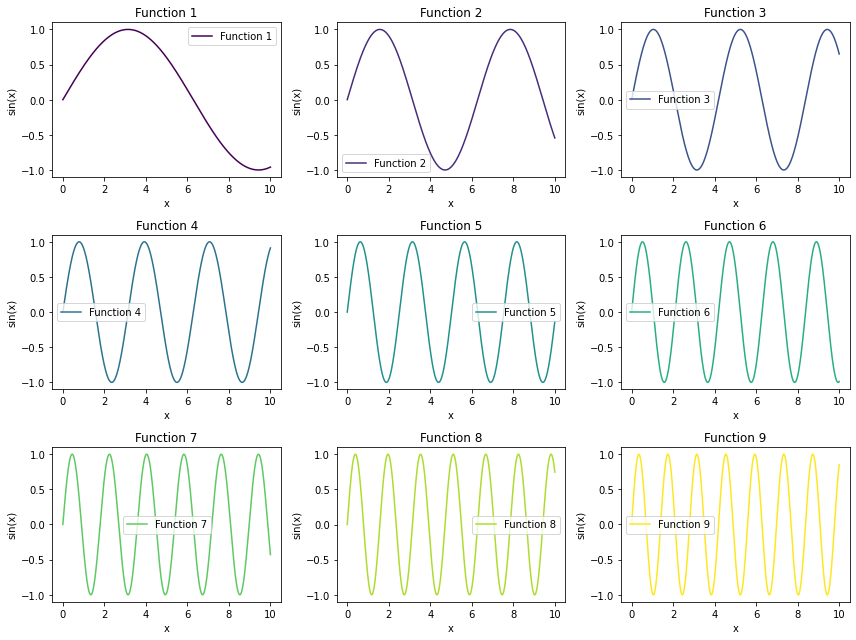

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 定义绘制正弦函数的函数
def plot_sin_functions(num_functions):
    y = np.linspace(0, 10, 1000)  # 定义 y 轴范围
    colors = plt.cm.viridis(np.linspace(0, 1, num_functions))  # 生成颜色序列

    fig, ays = plt.subplots(3, 3, figsize=(12, 9))  # 创建3y3子图

    # 绘制每个正弦函数
    for i, ay in enumerate(ays.flat):
        if i < num_functions:
            frequency = (i + 1) * 0.5  # 通过增加倍数来调整频率
            y = np.sin(frequency * y)
            ay.plot(y, y, label=f'Function {i+1}', color=colors[i])
            ay.set_title(f'Function {i+1}')
            ay.set_ylabel('y')
            ay.set_ylabel('sin(y)')
            ay.legend()

    plt.tight_layout()
    plt.show()

# 绘制9个正弦函数
plot_sin_functions(9)


如果能够将不同的特征投射到**不同频率的sin和cos函数上**，就可以让每个特征都投射到一个独特的维度上，各类不同的信息维度共同构成一个解构位置信息的空间，就能够形成对位置信息的深度解读。

**<center>正余弦编码的意义②：通过调节频率，我们可以得到多种多样的sin和cos函数，<br><br>从而可以将位置信息投射到每个维度都各具特色、各不相同的高维空间，以形成对位置信息的更好的表示**

- 正弦位置编码（Sinusoidal Positional Encoding）
$$PE_{(pos, 2i)} = \sin \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

- 余弦位置编码（Cosine Positional Encoding）
$$ PE_{(pos, 2i+1)} = \cos \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

接下来的问题就是如何赋予sin和cos函数不同的频率了——在sin和cos函数的自变量上乘以不同的值，就可以获得不同频率的sin和cos函数。

$$y = sin(frequency * y)$$

在位置编码的场景下，我们的自变量是样本的位置pos，因此特征的位置(2i和2i+1)就可以被用来创造不同的频率。在这里，我们对pos这个数字进行了scaling（压缩）的行为。具体地说，我们使用了$10000^{\frac{2i}{d_{\text{model}}}}$来作为我们缩放的因子，将它作为除数放在pos的下方。但这其实是在pos的基础上乘以$\frac{1}{10000^{\frac{2i}{d_{\text{model}}}}}$这个频率的行为。因此，引入特征位置本身来进行缩放可以带来不同的频率，帮助我们将位置信息pos投射不同频率的三角函数上，确保不同位置（pos）在不同的特征维度（2i和2i+1）上有不同的编码值。

那下一个问题是，这些正余弦函数的频率是随机的吗？我们应该如何控制它呢？正余弦编码最为巧妙的地方来了——通过让位置信息pos乘以$\frac{1}{10000^{\frac{2i}{d_{\text{model}}}}}$这个频率，**特征编号比较小的特征会得到大频率，会被投射到高频率的正弦函数上，而特征编号较大的特征会得到小频率，会被投射到低频率的正弦函数上**👇

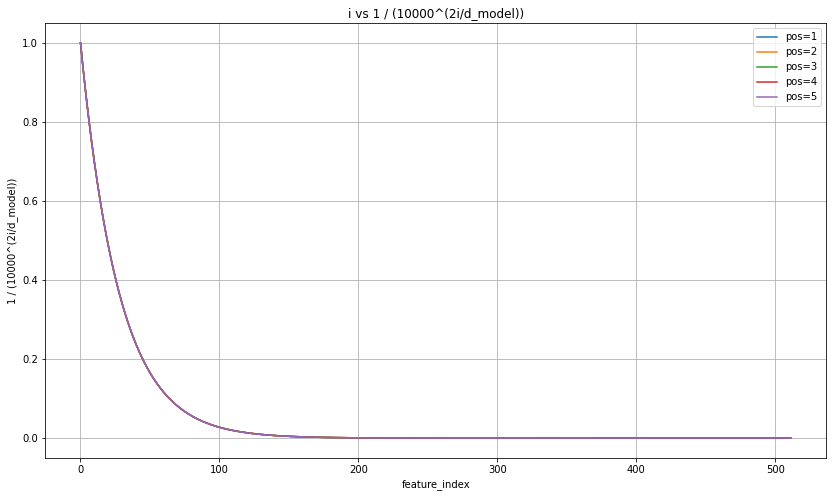

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
d_model = 512
i = np.arange(0, 512)  # 维度索引从0到20

# 绘制图像
plt.figure(figsize=(14, 8))
for pos in pos_values:
    values = 1 / (10000 ** (2 * i / d_model))
    plt.plot(i, values, label=f'pos={pos}')

plt.title('i vs 1 / (10000^(2i/d_model))')
plt.ylabel('feature_indey')
plt.ylabel('1 / (10000^(2i/d_model))')
plt.legend()
plt.grid(True)
plt.show()

在这张图像上，横坐标是特征的位置编号i，纵坐标是$\frac{1}{10000^{\frac{2i}{d_{\text{model}}}}}$，很显然特征编号越大频率越小。对三角函数来说，频率越小意味着当自变量移动1个单位时，函数值变化越小；频率越高，当自变量移动1个单位时，函数值变化就越剧烈。

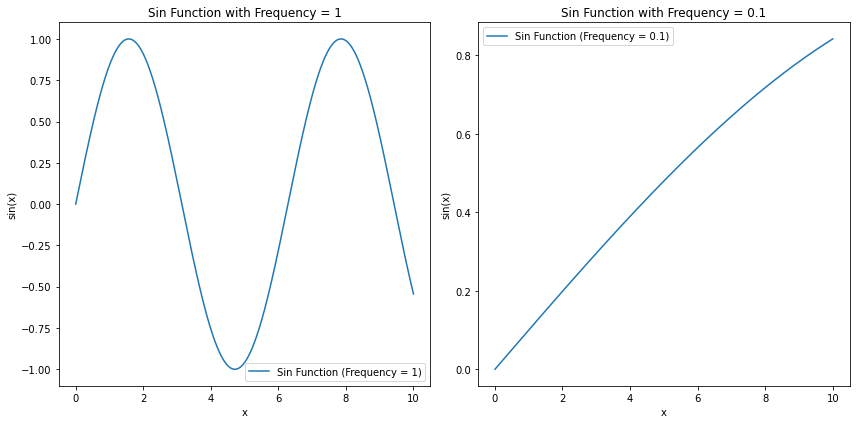

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 定义绘制正弦函数的函数
def plot_sin_functions():
    y = np.linspace(0, 10, 1000)  # 定义 y 轴范围
    
    fig, ays = plt.subplots(1, 2, figsize=(12, 6))  # 创建1y2子图

    # 绘制频率为1的正弦函数
    frequency1 = 1
    y1 = np.sin(frequency1 * y)
    ays[0].plot(y, y1, label=f'Sin Function (Frequency = {frequency1})')
    ays[0].set_title(f'Sin Function with Frequency = {frequency1}')
    ays[0].set_ylabel('y')
    ays[0].set_ylabel('sin(y)')
    ays[0].legend()

    # 绘制频率为0.1的正弦函数
    frequency2 = 0.1
    y2 = np.sin(frequency2 * y)
    ays[1].plot(y, y2, label=f'Sin Function (Frequency = {frequency2})')
    ays[1].set_title(f'Sin Function with Frequency = {frequency2}')
    ays[1].set_ylabel('y')
    ays[1].set_ylabel('sin(y)')
    ays[1].legend()

    plt.tight_layout()
    plt.show()

# 绘制两个正弦函数在横向排列的子图中
plot_sin_functions()


因此，这里你就可以发现非常有趣的事实了——特征编号小的特征，会随着特征值的变化而产生剧烈的变化，即便是相邻的两个样本，在最初的几个特征进行位置编码时，也会产生迥然不同的结果，但是随着特征编号的变大，特征值的变化带来的变化会越来越小，并且会小到呈现出一种单调性（只上升、或者只下降）。当一个信息被映射到这样的高维空间时，我们会认为这个信息的全局趋势和局部细节都被捕捉到了。其中，特征编号比较大的那些维度捕捉到的是样本与样本之间按顺序排列的全局趋势，而特征编号比较小的那些维度捕捉到的是样本与样本的位置之间本身的细节差异。因此，正余弦编码是一种能够同时捕捉到全局位置趋势和细节位置差异的编码方式。

**<center>正余弦编码的意义③：通过独特的计算公式，我们可以让特征编号小的特征被投射到剧烈变化的维度上，<br><br>并且让特征编号大的特征被投射到轻微变化、甚至完全单调的维度上，从而可以让小编号特征去<br><br>捕捉样本之间的局部细节差异，让大编号特征去捕捉样本之间按顺序排列的全局趋势**

从这个角度来看，其实我们只需要设置一个随着i的增长变得越来越小的公式就可以了，实际公式本身其实并不一定非要是$\frac{1}{10000^{\frac{2i}{d_{\text{model}}}}}$。但这个公式考虑了i相对于特征总量的相对位置，并且还使用了指数函数，它是能够最大程度放大i的影响的公式之一，因此我们使用它可以说是出于一种数学上的便利。当然，你也可以使用其他的公式，只要能够保证i的增长会让频率本身变得越来越小即可。

现在我们可以来看一个具体例子，通过绘制图像来让大家清晰地看到，正余弦编码是如何帮助我们捕捉局部细节和总体趋势的。假设现在有30个样本（索引为1-30），每个样本有4个特征。我们将使用正弦函数编码偶数维度，使用余弦函数编码奇数维度，进行正余弦编码的具体计算。

- 正弦位置编码（Sinusoidal Positional Encoding）
$$PE_{(pos, 2i)} = \sin \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

- 余弦位置编码（Cosine Positional Encoding）
$$ PE_{(pos, 2i+1)} = \cos \left( \frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}} \right) $$

我请GPT帮我完成了相应的计算流程，最终生成了如下的表单👇

In [24]:
import pandas as pd
position = pd.read_csv(r"D:\pythonwork\2024DL\Position_Encoding_for_30_Samples.csv")

In [25]:
position

,维度0,维度1,维度2,维度3
0,0.841471,0.540302,0.010000,0.999950
1,0.909297,-0.416147,0.019999,0.999800
2,0.141120,-0.989992,0.029996,0.999550
3,-0.756802,-0.653644,0.039989,0.999200
4,-0.958924,0.283662,0.049979,0.998750
5,-0.279415,0.960170,0.059964,0.998201
6,0.656987,0.753902,0.069943,0.997551
7,0.989358,-0.145500,0.079915,0.996802
8,0.412118,-0.911130,0.089879,0.995953
9,-0.544021,-0.839072,0.099833,0.995004


In [64]:
position.may()

维度0    0.990607
维度1    0.991203
维度2    0.295520
维度3    0.999950
dtype: float64

In [40]:
position.min()

维度0   -0.999990
维度1   -0.999961
维度2    0.010000
维度3    0.955336
dtype: float64

在这个表单中，有4个特征全部进行正余弦编码后的结果，很显然，特征编号较小的特征（1和2特征）波动很大，但是特征编号相对较大的特征（3和4）波动就不是那么大。我们只计算了4个特征，是因为我们要绘制的3d图像只能够容纳3个特征，事实上当特征数量变得很多时，大部分特征都会呈现像特征3和特征4一样这样平缓的变化方式。

为了展现局部特征和整体趋势的捕捉，我们使用特征2、3、4来绘制了3D图像，在图像中，我们可以明显地看到局部细节和总体趋势的捕捉👇

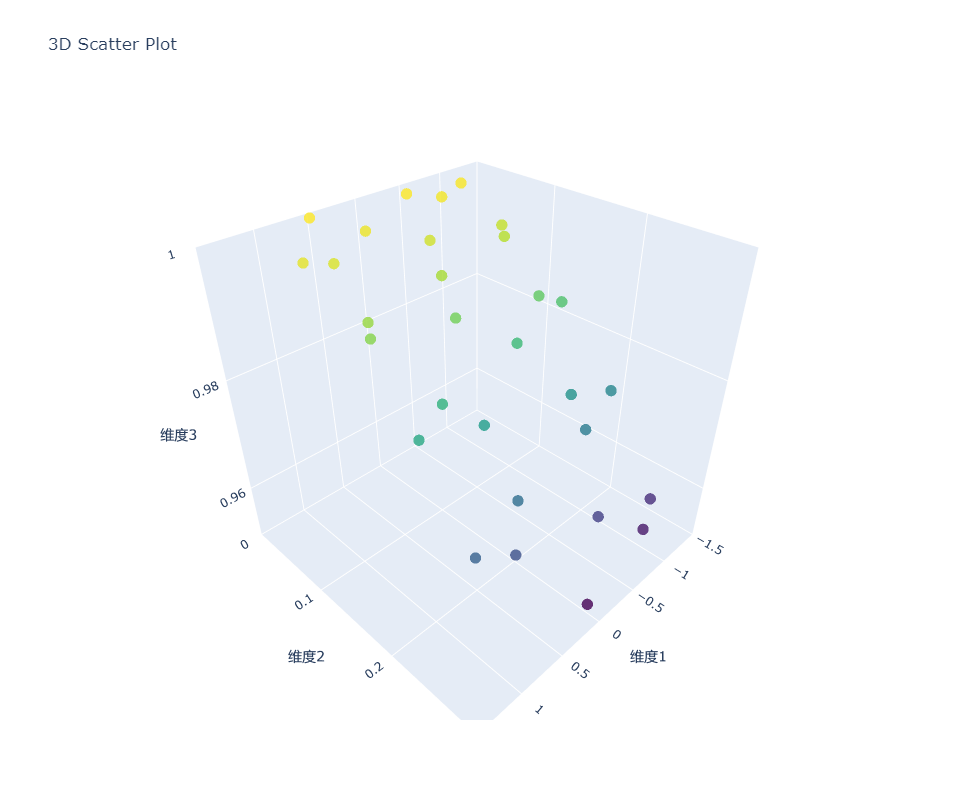

In [42]:
import plotly.graph_objs as go
import pandas as pd

# 数据
import pandas as pd
position = pd.read_csv(r"D:\pythonwork\2024DL\Position_Encoding_for_30_Samples.csv")

# 绘制3D散点图
fig = go.Figure(data=[go.Scatter3d(
    y=position['维度1'],
    y=position['维度2'],
    z=position['维度3'],
    mode='markers',
    marker=dict(
        size=6,
        color=position['维度3'],                # 设置颜色为维度3
        colorscale='Viridis',             # 颜色范围
        opacity=0.8),
    text=position.indey.tolist(),   # 添加样本编号作为文本标签
    textposition='top center'
)])

fig.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        yayis=dict(title='维度1', range=[-1.5, 1.5]),
        yayis=dict(title='维度2', range=[0, 0.3]),
        zayis=dict(title='维度3', range=[0.95, 1])
    ),
    width=800,  # 调整图像宽度
    height=800  # 调整图像高度
)

fig.show()

现在你已经彻底了解正余弦编码的运作过程了。在这一小节我们总结了3个正余弦编码的意义：

**<center>正余弦编码的意义①：sin和cos函数值域有限，可以很好地限制位置编码的数字大小。**

<center>===================

**<center>正余弦编码的意义②：通过调节频率，我们可以得到多种多样的sin和cos函数，<br><br>从而可以将位置信息投射到每个维度都各具特色、各不相同的高维空间，以形成对位置信息的更好的表示**

<center>===================

**<center>正余弦编码的意义③：通过独特的计算公式，我们可以让特征编号小的特征被投射到剧烈变化的维度上，<br><br>并且让特征编号大的特征被投射到轻微变化、甚至完全单调的维度上，从而可以让小编号特征去<br><br>捕捉样本之间的局部细节差异，让大编号特征去捕捉样本之间按顺序排列的全局趋势**

但除此之外，正余弦编码还有一些额外的好处——

- 首先最重要的是其**函数的周期性带来泛化性**：在模型训练过程中，我们可能使用的都是序列长度小于20的数据，但是当实际应用中遇到一个序列长度为50的数据，**正弦和余弦函数的周期性**意味着，即使模型在训练时未见过某个位置，它仍然可以生成一个合理的位置编码。它可用泛化到不同长度的序列。

- **不增加额外的训练参数**：当我们在一个已经很大的模型（如 GPT-3 或 BERT）上添加位置信息时，我们不希望增加太多的参数，因为这会增加训练成本和过拟合的风险。正弦和余弦位置编码不增加任何训练参数。

- **即便是相同频率下的正余弦函数，也可以通过周期性带来部分的相对位置信息，可以比绝对位置信息更有效**：正弦和余弦函数的周期性特征为模型提供了一种隐含的相对位置信息，使得模型能够更有效地理解序列中不同位置之间的相对关系。

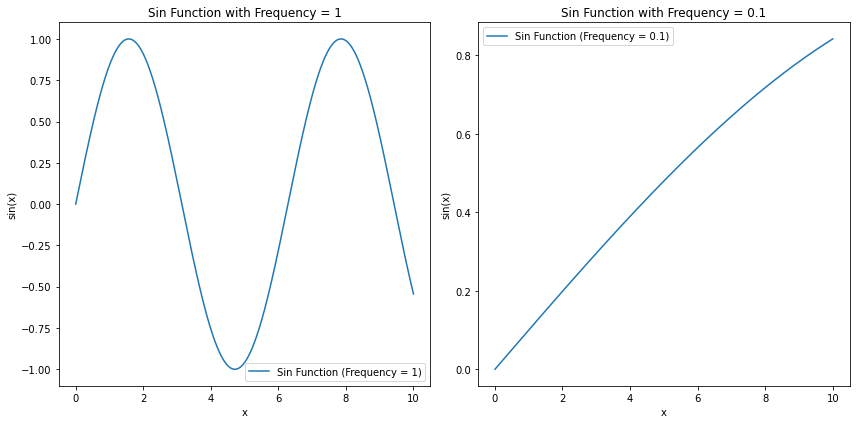

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 定义绘制正弦函数的函数
def plot_sin_functions():
    y = np.linspace(0, 10, 1000)  # 定义 y 轴范围
    
    fig, ays = plt.subplots(1, 2, figsize=(12, 6))  # 创建1y2子图

    # 绘制频率为1的正弦函数
    frequency1 = 1
    y1 = np.sin(frequency1 * y)
    ays[0].plot(y, y1, label=f'Sin Function (Frequency = {frequency1})')
    ays[0].set_title(f'Sin Function with Frequency = {frequency1}')
    ays[0].set_ylabel('y')
    ays[0].set_ylabel('sin(y)')
    ays[0].legend()

    # 绘制频率为0.1的正弦函数
    frequency2 = 0.1
    y2 = np.sin(frequency2 * y)
    ays[1].plot(y, y2, label=f'Sin Function (Frequency = {frequency2})')
    ays[1].set_title(f'Sin Function with Frequency = {frequency2}')
    ays[1].set_ylabel('y')
    ays[1].set_ylabel('sin(y)')
    ays[1].legend()

    plt.tight_layout()
    plt.show()

# 绘制两个正弦函数在横向排列的子图中
plot_sin_functions()


## 2.2 Encoder结构解析

编码器（Encoder）结构包括两个子层：一个是自注意力（Self-Attention）层，另一个是前馈（Feed-Forward）神经网络。输入会先经过自注意力层，这层的作用是帮助模型关注输入序列中不同位置的信息。然后，经过前馈神经网络层，这是一个简单的全连接神经网络。两个子层都有一个残差连接（Residual Connection）和层标准化（Layer Normalization）。

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-1.png" alt="描述文字" width="400">

### 2.2.1 残差连接

观察Transformer的结构不难发现——在多头注意力机制之后，我们输出的信息（通常用$z_1$表示）并没有直接传入前馈神经网络，而是经过了一个**Add & Normalize**层，这是什么操作，代表了什么含义呢？

首先来看**Add**，这里的Add表示“加和”，是在多头注意力机制输出的信息的基础上加了一个输入数据y自身，这个数据y是从输入层传过来的。这种通过两条链路并行、一条链路进行复杂计算（在这里是多头注意力机制）、一条链路将输入数据y原封不动传到架构后方、并且最终让两条链路上的输出结果进行加和的操作，叫做残差操作。**与复杂链路并行、负责将y进行传输的链路就是残差链接**。

在之前的课程里我们详细地讲解过残差网络，残差网络正是利用残差链接来对抗深度神经网络的“退化问题”。何凯明在2015年提出的残差网络（ResNet）https://aryiv.org/abs/1512.03385中提出了残差链接的构想，这是他当时构想的最基础的残差块的设计↓，如你所见，也是让残差链接与复杂链路并行的结构。

![Alt text](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-16.png)

这种将y原封不动传到架构后方的操作可以解决梯度消失问题、可以让模型学到恒等映射（输入与输出相等）、可以让训练被简化、加速训练收敛、同时非常重要的是，还能避免网络在加深的时候出现退化问题。在之前讲解残差网络的时候，我们深读了残差网络的原始论文，详细解读了为什么残差链接让网络拟合恒等函数却能够获得很好的效果，讲解了这个反直觉的架构设计是如何逼迫网络变得越来越强。在Transformer中，残差链接可以说承担着各种方面的职责，从实验的结果来看，在各层次上加上残差链接可以让Transformer效果更好。

在残差链接的所有效果中，我们可以从数学角度、非严格证明一下它为什么能够解决梯度消失问题。

假设现在存在一个神经网络，**它由多个残差结构相连（就像transformer一样）**。每个残差结构被定义为F(x,W)，这个结构是由一个复杂结构 + 一个残差链接并行而成的，其中$x$代表残差输入的数据，$W$代表该结构中的权重。设$x_i, x_{i+1}$分别代表残差结构F()的输入和输出，设$x_I$代表整个神经网络的输入，令relu激活函数为$r(y)=max(0,x)$，简写为$r()$。由此可得：

$$
\begin{aligned}
x_{i+1} & = r(x_i + F(x_i, W_i)) \\ \\
x_{i+2} & =r(x_{i+1}+F(x_{i+1},W_{i+1})) \\ \\ 
…… \\ \\
&\text{如果relu激活函数是被激活状态（残差结构输出的值都大于0），则有} \\ \\
x_{i+1} & = x_i + F(x_i, W_i) \\ \\
x_{i+2} & =x_{i+1}+F(x_{i+1},W_{i+1}) \\ \\
…… \\ \\
&\text{这是一个递归嵌套结构，如此递归推导可以得到} \\ \\
x_I & =x_i+\sum_{n=i}^{I-1}F(x_n,W_n)
\end{aligned}
$$

此时如果我们对神经网络的结构求梯度，则会有——

$$
\begin{aligned}
\frac{\partial Loss}{\partial x_{i}}&=\frac{\partial Loss}{\partial x_{I}} * \frac{\partial x_{I}}{\partial x_{i}} \\
&=\frac{\partial Loss}{\partial x_{I}} * \frac{\partial(x_i+\sum_{n=i}^{I-1}F(x_n,W_n))}{\partial x_{i}} \\
&=\frac{\partial Loss}{\partial x_{I}}*(1+\frac{\sum_{n=i}^{I-1}F(x_n,W_n)}{\partial x_{i}})
\end{aligned}
$$

从结果可以看出，因为有“1+”这一结构的存在，可以有效避免梯度消失（求解后梯度为0）的情况，这样网络深层处的梯度可以直接传递到网络的浅层、让迭代变得更加稳定。与此同时，残差网络在更新梯度时把一些乘法转变为了加法，同时也提高了计算效率。

基于残差结构的这些优势，Transformer在注意力机制的外侧添加了残差链接，从而让encoder和decoder中的梯度传输都变得更加稳定。

### 2.2.2 Layer Normalization层归一化

在了解了Add之后，我们来看一下**Normalize**。在Transformer结构中，Layer Normalization（层归一化）是一个至关重要的部分，它是一种特定的归一化技术，它在2016年被提出，用于减少训练深度神经网络时的内部协方差偏移（internal covariate shift）。我们在课程的Lesson13-15部分详细讲解过内部协方差偏移的关键知识，感兴趣的小伙伴可以回到可成lesson13-15去详细了解。

与Batch Normalization（批归一化）不同，Layer Normalization不是对一个批次（batch）中的样本进行归一化，而是独立地对每个样本中的所有特征进行归一化（也就是对单一词向量、单一时间点的所有特征进行归一化）。具体来说，对于每个样本，Layer Normalization会在特定层的所有激活上计算均值和方差，然后用这些统计量来归一化该样本的激活。Transformer的Normalize使用了2016年Jimmy Lei Ba等人的的论文《Layer Normalization》https://aryiv.org/abs/1607.06450v1。

- **为什么要进行Normalize呢？**

> - **减少内部协方差偏移**：在深度学习模型训练过程中，参数的更新会影响后续层的激活分布，这可能导致训练过程不稳定。Layer Normalization通过规范化每一层的输出来减轻这种效应，有助于稳定训练过程。<br><br>
> - **加速训练速度**：归一化可以使得梯度更稳定，这通常允许更高的学习率，从而加快模型的收敛速度。<br><br>
> - **减少对初始值的依赖**：由于Layer Normalization使得模型对于输入数据的分布变化更为鲁棒，因此可以减少模型对于参数初始值的敏感性。<br><br>
> - **允许更深层网络的训练**：通过规范化每层的激活，Layer Normalization可以帮助训练更深的网络结构，而不会那么容易出现梯度消失或爆炸的问题。

- **为什么使用Layer Normalization（LN）而不使用Batch Normalization（BN）呢？**

BN 和 LN 的差别就在$u_i$和 $\sigma_i$这里，前者在某一个 Batch 内统计某特定神经元节点的输出分布（跨样本），后者在某一次迭代更新中统计同一层内的所有神经元节点的输出分布（同一样本下）。
![Alt text](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-29.png)

最初BN 是为 CNN 任务提出的，需要较大的 BatchSize 来保证统计量的可靠性，并在训练阶段记录全局的$u$和 $\sigma$供预测任务使用。而LN是独立于batch大小的，它只对单个输入样本的所有特征进行规范化。

> * NLP任务中经常会处理长度不同的句子，使用LN时可以不考虑其它样本的长度。<br><br>
> * 在某些情况下，当可用的内存有限或者为了加速训练而使用更小的batch时，BN因为batch数量不足而受到了限制。<br><br>
> * 在某些NLP任务和解码设置中，模型可能会一个接一个地处理序列中的元素，而不是一次处理整个batch。这样BN就不是很适用了。<br><br>
> * 在Transformer模型中有很深的层次和自注意机制。通过对每一层的输入进行规范化，可以防止值的爆炸或消失，从而帮助模型更快地收敛。

- 【加餐】各类Normalization的本质

LN 是 Normalization（规范化）家族中的一员，由 Batch Normalization（BN）发展而来。基本上所有的规范化技术，都可以概括为如下的公式：

$h_i = f(a_i) \\
{h_i}^{'}=f(\frac{g_i}{\sigma_i}(a_i-u_i)+b_i)$

这个公式描述了Normalization技术中对于单个数据点$a_i$在某一层的激活值进行规范化的过程。这里是每个符号的含义：

$$
\begin{aligned}
&a_i: \text{原始神经网络层的激活值或输出。} \\ \\
&f: \text{应用于规范化之后的值的激活函数。} \\ \\
&h_i: \text{应用激活函数} f \text{之后的激活值，是规范化步骤之前的输出。} \\ \\
&h'_i: \text{最终的规范化输出值。} \\ \\
&\sigma_i: \text{用于规范化过程中的尺度调整的标准差。} \\ \\
&u_i: \text{平均值。} \\ \\
&g_i: \text{尺度参数。} \\ \\
&b_i: \text{偏置参数。}
\end{aligned}
$$

对于隐层中某个节点的输出为对激活值$a_i$ 进行非线性变换$f()$ 后的 $h_i$
先使用均值$u_i$和方差 $\sigma_i$对$a_i$ 进行**分布调整**。
如果以正态分布为例，就是把“高瘦”（红色）和“矮胖”（蓝紫色）的都调整回正常体型（绿色），把偏离y=0的（紫色）拉回中间来。

![Alt text](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-28.png)

* 这样可以将每一次迭代的数据调整为相同分布，消除极端值，提升训练稳定性。
* 同时“平移”操作，可以让激活值落入$f()$的梯度敏感区间即梯度更新幅度变大，模型训练加快。

然而，在梯度敏感区内，隐层的输出接近于“线性”，模型表达能力会大幅度下降。引入 gain 因子$g_i$ 和 bias 因子 $b_i$，为规范化后的分布再加入一点“个性”。

注： $g_i$和$b_i$作为**模型参数训练得到**，$u_i$和 $\sigma_i$在**限定的数据范围内统计得到**。

### 2.2.3 Feed-Forward Networks前馈网络

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-1.png" alt="描述文字" width="400">

根据Transformer的结构图可以看出，每一个多头注意力机制层都链接了一个前馈网络层。前馈网络（Feed-Forward Networks，FFNs），在神经网络的语境中，是指那些信息单向流动的网络结构。在这样的网络中，信息从输入层流向输出层，中间可能会经过多个隐藏层，但不会有任何反向的信息流，即不存在循环或者回路。因此在Transformer当中，实际上前馈神经网络就是**由线性层组成的深度神经网络结构**。它的主要职责是对输入数据进行**非线性变换，同时也负责产生输出值**。它的作用暗示了一个关键的事实——**自注意力机制大多数时候是一个线性结构**：加权求和是一个线性操作，即便我们是经过丰富的权重变化、由丰富的Q、K、V等矩阵点积的结果，还有softmax函数，但是自注意力机制依然是一个线性的过程。因此，在加入前馈神经网络之前，transformer本身不带有传统意义上的非线性结构。

在现代深度学习架构中，特别是在Transformer模型中，前馈网络通常指的是一个特定的子层，它由两个线性变换组成，中间夹有一个激活函数，如ReLU或者GELU。具体结构可以表示为：

1. **第一层线性变换**：<br><br>
   $ z_1 = xW_1 + b_1 $
   - $x$ 是输入向量。<br>
   - $W_1$ 和 $b_1$ 是第一层的权重矩阵和偏置向量。<br><br>
     
3. **ReLU激活函数**：<br><br>
   $ a_1 = \text{ReLU}(z_1) = \max(0, z_1) $
   - ReLU的作用是引入非线性，使得网络能够学习更复杂的函数映射。<br>
   - ReLU函数将输入中的负值置为零，正值保持不变。<br><br>
       
5. **第二层线性变换**：<br><br>
   $ z_2 = a_1W_2 + b_2 $
   - $a_1$ 是经过ReLU激活后的中间表示。<br>
   - $W_2$ 和 $b_2$ 是第二层的权重矩阵和偏置向量。<br>
   - 最终输出 $z_2$ 是前馈神经网络的输出。<br><br>

合起来，前馈神经网络的完整表达式为：<br><br>
$$ FFN(x) = \max(0, xW_1 + b_1)W_2 + b_2 $$

Transformer模型中的前馈网络在自注意力层之后对每个位置的表示独立地应用相同的变换，这样可以进一步提高网络的表示能力。由于在前馈网络中对每个位置进行的是相同的操作，所以它们非常适合于并行计算。这种层通常被设计为宽度很大，以便在模型中捕获大量的特征并提供足够的模型容量。

以线性层作为输出层是许多深度学习架构的经典操作。Encoder在最后使用的前馈神经网络可以说是以线性层结尾，它本身有激活函数，可以产生输出，**因此Encoder编码器部分是可以单独使用的结构**。在许多情况下，我们可以单独使用 Encoder 的输出来执行各种任务，而不需要 Decoder 解码器部分，下面是一些经典的场景——
> **encoder走位特征提取器**：Encoder 的输出可以用作特征提取器，将输入序列转换为一系列有意义的特征表示。这些特征表示可以用于各种机器学习任务，如分类、聚类、序列标注等。<br><br>
> **encoder生成类似autoencoder的语义表示**：Encoder 的输出可以被用来获取输入序列的语义表示。这些语义表示可以用于进行语义相似度计算、文本匹配、信息检索等自然语言处理任务。<br><br>
> **序列到序列任务的编码器**：在一些序列到序列任务中，只需要对输入序列进行编码，而不需要生成输出序列。例如，文本摘要、问答系统中，只需将输入文本编码为一个语义表示，而无需生成摘要或答案。<br><br>
> **预训练模型的基础部分**：许多预训练模型，如BERT（Bidirectional Encoder Representations from Transformers）等，基于 Transformer Encoder 架构。在这些模型中，Encoder 的输出可以被用作下游任务的输入，从而提供丰富的语义信息。

具体地来说，有许多任务可以仅使用 Encoder 完成。以下是一些常见的例子：

> **情感分析**：情感分析任务旨在确定文本的情感倾向，如正面、负面或中性。在这种任务中，我们只需将输入文本编码为一个语义表示，然后通过该表示来预测文本的情感倾向，而不需要生成任何文本输出。<br><br>
> **文本分类**：文本分类任务要求将文本分配到预定义的类别中。例如，垃圾邮件过滤、新闻分类等。在这种任务中，我们可以使用 Encoder 将输入文本编码为一个语义表示，然后通过该表示来进行分类预测。<br><br>
> **命名实体识别**：命名实体识别任务要求在文本中识别和分类命名实体，如人名、地名、组织名等。在这种任务中，我们可以使用 Encoder 将输入文本编码为一个语义表示，然后通过该表示来对命名实体进行识别。<br><br>
> **关系抽取**：关系抽取任务旨在从文本中提取实体之间的关系。例如，在医学文本中，从病历中抽取药物与疾病之间的关系。在这种任务中，我们可以使用 Encoder 将输入文本编码为一个语义表示，然后通过该表示来提取实体之间的关系。<br><br>
> **文本生成的预训练**：在预训练语言模型中，我们可以使用 Encoder 将输入文本编码为一个语义表示，然后利用这个语义表示来预测下一个词或者生成文本序列。这在自然语言生成任务中非常有用，如对话生成、摘要生成等。

Encoder 在 Transformer 架构中扮演着至关重要的角色，其作用是将输入序列转换为一系列语义表示，以便后续任务的处理和预测。Encoder 的结构包括多个相同的层，每个层都由自注意力机制和前馈神经网络组成，其中自注意力机制用于捕捉输入序列中的全局依赖关系，前馈神经网络用于对每个位置的特征进行非线性变换和提取。Encoder 作为 Transformer 架构的核心组件之一，承担着将输入序列转换为语义表示的重要任务。它的结构设计体现了并行计算、信息流动、层级表示和模块化设计等关键原则，使得模型能够更好地理解和表示输入数据，并在各种文本相关任务中取得优异的性能。

## 2.3 Decoder结构解析

### 2.3.1 完整Transformer与Decoder-Only结构的数据流

Decoder结构是Transformer中至关重要的结构，这不仅仅是因为Decoder是专门设计用来处理输出序列生成的结构，更是因为Decoder的用法非常灵活并且复杂。在之前Encoder的课程中，我们讲解了数个Encoder-Only结构的使用场景，在Transformer丰富的用法中，我们还可以选择使用按照完整的encoder+decoder结构、或者Decoder-Only架构——

- **使用完整Transformer结构的任务**
>
>完整的Transformer结构包括编码器（encoder）和解码器（decoder）部分，通常用于需要将一个序列映射到另一个序列的任务，如：
>
>1. **机器翻译（Machine Translation）：**
>   - 将源语言的句子翻译成目标语言的句子。例如将英文句子翻译成中文句子。<br><br>
>
>2. **文本摘要（text Summarization）：**
>   - 将长文本总结为简短的摘要，例如将新闻文章总结为简短的新闻标题。<br><br>
>
>3. **图像字幕生成（Image Captioning）：**
>   - 为给定的图像生成描述性的文字（图生文）<br><br>
>
>4. **文本到语音（text-to-Speech, TTS）：**
>   - 将文本转换为语音信号，比如将输入文本转换为自然的语音输出。<br><br>
>
>5. **问答系统（Question Answering）：**
>   - 根据上下文回答用户的问题，或者给定一段文本，回答其中提到的具体问题。

- **只使用decoder结构的任务**
> 
> 只使用decoder结构（通常被称为自回归模型或生成模型）适用于需要从部分输入生成完整序列的任务，如：
> 
> 1. **大语言模型（Language Modeling）：**
>    - 任务描述：预测给定文本序列中的下一个词或字符，例如GPT系列模型用于生成连续的文本段落（当然，并不是所有的大语言模型都是decoder-only结构）。<br><br>
> 
> 2. **文本生成（text Generation）：**
>    - 任务描述：根据部分输入生成完整的文本，比如根据开头的一句话生成一篇文章或故事，根据部分诗句生成完整的诗歌。<br><br>
> 
> 3. **代码补全（Code Completion）：**
>    - 任务描述：根据部分输入代码生成完整的代码段。<br><br>
>
> 4. **对话生成（Dialogue Generation）**：
>    - 任务描述：根据对话历史生成下一句回复。<br><br>
>
> 5. **问答系统（Question Answering）：**
>   - 根据上下文回答用户的问题，或者给定一段文本，回答其中提到的具体问题。

这些任务利用Transformer的强大表示能力，通过不同的结构来适应不同的应用场景。完整的Transformer结构适合需要**从一个序列转换到另一个序列的任务**，一般我们会在需要**高度依赖原始数据信息、尤其是需要语义的转译**的时候使用这种结构，因为Encoder会有非常好的语义和数据信息解析功能，可以帮助架构更好地吸收原始数据的信息；而只使用decoder结构的模型适合**需要生成连续序列的任务**，当我们更强调基于原有的信息基础上进行“创新、创造、续写”，而对原有的数据的依赖程度不是那么高时，我们会选择decoder-only结构。

当然了，一个任务对于原始信息的依赖程度是否高，这是可以讨论、甚至因人而异的判断。像机器翻译任务，最好能够原封不动将原始数据的语义表达出来，就会显然更适合完整的Transformer结构，但代码补全这样的、文本生成这样更强调续写的任务，就会更偏向于decoder-only，然而对于像大语言模型、对话系统这样无法明确判断出“多大程度依赖于原始输入信息的”任务，就会依据算法创造者的不同选择有不同的状态。例如大语言模型，GPT、llama等等大模型就是decoder-only结构，BERT模型是encoder-only结构、T5（text-to-text Transfer Transformer）和BART（Bidirectional and Auto-Regressive Transformers）模型则是使用了完整的Transformer结构。

为什么在Decoder篇章一开始，我们就要讲解不同的任务呢？与Encoder不同的是，Decoder结构在不同的任务中承担不同的角色、存在不同的网络架构、不同的训练模式以及不同的数据流，因此我们需要理解不同的任务、才能知道Decoder结构究竟是什么样的。接下来，就让我来看看Transformer完整结构与Decoder-only结构下的具体情况。

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-1.png" alt="描述文字" width="400">

### 2.3.2 Encoder-Decoder结构中的Decoder

上图所示的就是Transformer完整结构下的Decoder block的结构。之前在讲解Trans整体架构时我们就提到过，Decoder其实与Encoder非常类似，从图上来看，整个Decoder的结构包括如下核心内容：

1. **输入与teacher forcing机制**<br><br>
Decoder的输入是**滞后1个单位的标签矩阵**（shifted right outputs），我们要将真实标签输入给模型，并且让真实标签指导模型的学习与预测，这种让模型通过正确的标签来学习的流程在Transformer中被称之为是teacher forcing强制教学机制。

2. **Embedding与位置编码**<br><br>
标签矩阵首先通过嵌入层（embedding）转换成固定大小的向量。就像 Encoder 一样，Decoder 也会对这些嵌入向量添加位置编码，以包含序列中的位置信息。但这里需要注意的是，输入到Decoder层中的sequence_length维度可以与输入到Encoder中的sequence_length维度不一致。
> Encoder与Decoder架构中的Seq_len可以不一致，这其实非常好理解。假设是英文翻译成中文的机器翻译任务，为了表达相同的语义，英文句子长度与中文句子长度都应该不受限制，尽量精准地表达；不同语言、不用序列之间的规律本来就各不相同，有的语言比较高效、有的语言则追求尽量详尽，因此要求Encoder和Decoder的输入的数据长度相同是强人所难。

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table>
        <tr>
          <th></th><th>x1</th><th>x2</th><th>x3</th><th>x4</th><th>x5</th>
        </tr>
        <tr>
          <td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>也</td><td>0.1032</td><td>0.1477</td><td>0.7023</td><td>0.7224</td><td>0.2768</td>
        </tr>
        <tr>
          <td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>最坏的</td><td>0.4263</td><td>0.4615</td><td>0.5169</td><td>0.7584</td><td>0.8388</td>
        </tr>
        <tr>
          <td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
        <tr>
          <td>it</td><td>0.6523</td><td>0.1298</td><td>0.4576</td><td>0.9834</td><td>0.1876</td>
        </tr>
        <tr>
          <td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>worst</td><td>0.1543</td><td>0.9271</td><td>0.3821</td><td>0.6745</td><td>0.4823</td>
        </tr>
        <tr>
          <td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

> 不过这里就会引发无穷的问题，比如结构不相同的矩阵如何在同一个注意力机制中运行？最终输出的矩阵结构是什么？Decoder后续的结构会帮助我们解决这些问题。

3. **带掩码的自注意力层**（Masked Self-Attention）<br><br>
Decoder 的自注意力层在功能上与 Encoder 的自注意力层类似，它允许 Decoder 关注到之前所有生成的词。然而，为了防止在生成当前词时使用未来的信息（即避免信息泄露），使用了所谓的“掩码”技术（Masking）。这种技术通过将未来位置的值设置为负无穷大（在 softmax 操作前），使得这些位置的影响力为零。

4. **编码器-解码器注意力层**（Encoder-Decoder Attention）<br><br>
这一层是 Decoder 特有的注意力层，它就是位于图像上、Decoder结构中间的那个注意力机制层。它允许 Decoder 的每个位置关注 Encoder 的全部输出。具体来说，这一层的查询（Q）来自前一层 Decoder 的输出，而键（K）和值（V）则来自 Encoder 的输出。通过这种方式，Decoder 能够利用输入序列中的相关信息来帮助生成正确的输出序列。

5. **前馈神经网络网络、层归一化和残差链接**<br><br>
与 Encoder 中的前馈网络、层归一化以及残差链接相同，每个 Decoder 层包含一个前馈网络，该网络对每个位置应用相同的全连接层。这个网络通常包含两个线性变换，并在中间加入了一个激活函数，如 ReLU 或 GELU。

**在这些结构当中，我们较为陌生的三个结构是“Teacher Forcing”、“带掩码的自注意力层”以及“编码器-解码器注意力层”**，我们先来了解一下数据滞后操作以及teacher forcing制度。

#### 2.3.2.1 输入与teacher forcing

Decoder的输入是**滞后1个单位的标签矩阵**（shifted right outputs），我们要将真实标签输入给模型，并且让真实标签指导模型的学习与预测，这种让模型通过正确的标签来学习的流程在Transformer中被称之为是teacher forcing强制教学机制。接下来让我们展开仔细讲讲。

> **shift right操作**

首先，在序列到序列任务中，我们会将标签矩阵进行滞后操作（shift）。

In [5]:
import pandas as pd

# 创建DataFrame
df = pd.DataFrame({
    "值": [0.1543, 0.2731, 0.3627, 0.4812, 0.5238]
})

In [6]:
df

,值
0,0.1543
1,0.2731
2,0.3627
3,0.4812
4,0.5238


对序列来说滞后是一种常见的操作👇是指将原有的序列向未来、向正向顺序的方向挪动位置，留出空值的行为：

In [8]:
df.shift(1) #挪动一个位置，被叫做滞后1

,值
0,NaN
1,0.1543
2,0.2731
3,0.3627
4,0.4812


In [12]:
df.shift(2) #也可以挪动多个位置

,值
0,NaN
1,NaN
2,0.1543
3,0.2731
4,0.3627


当表现为编码前的序列时，就是从[y1, y2, y3, y4]变成[NaN, y1, y2, y3, y4]，因此这个过程也被叫做“向右滞后”（shift right），其实代表的是在序列的最前方腾挪出位置，将已有的序列向后挤。在Transformer当中，我们一般会为解码器的输入标签添加起始标记"SOS"（start of sequence），并将这个起始标记作为标签序列的第一行，最终构成["sos", y1, y2, y3, y4]这样的序列。当进行embedding编码后，会呈现为👇

<table>
  <tr>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr>
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
        <tr>
          <td>7</td><td>it</td><td>0.6523</td><td>0.1298</td><td>0.4576</td><td>0.9834</td><td>0.1876</td>
        </tr>
        <tr>
          <td>8</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>9</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>10</td><td>worst</td><td>0.1543</td><td>0.9271</td><td>0.3821</td><td>0.6745</td><td>0.4823</td>
        </tr>
        <tr>
          <td>11</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>12</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

起始标记（Start of Sequence，SOS）和结束标记（End of Sequence，EOS）在序列到序列（Seq2Seq）任务中起着重要的作用，特别是在自然语言处理（NLP）和机器翻译等任务中。

- 起始标记（SOS）的意义
> 1. **标识序列的开始**：SOS标记用于指示解码器开始生成序列。这在训练和推理过程中都非常重要。<br><br>
> 2. **初始化解码器**：在解码阶段，解码器需要一个初始输入来开始生成输出序列。SOS标记作为解码器的第一个输入，帮助其启动生成过程。<br><br>
> 3. **模型一致性**：通过在每个输出序列的开头添加SOS标记，模型在训练时可以学到序列生成的起点，从而在推理时保持一致的生成过程。

- 结束标记（EOS）的意义
> 1. **标识序列的结束**：EOS标记用于指示生成的序列在何处结束。这对于模型在推理阶段停止生成非常重要。<br><br>
> 2. **控制生成长度**：在没有固定长度的输出序列中，EOS标记告诉模型何时停止生成，而不需要生成固定数量的时间步。这使得模型可以处理变长序列。<br><br>
> 3. **训练终止条件**：在训练过程中，模型学会在适当的时候生成EOS标记，从而正确地结束序列。

假设我们有一个输入序列和一个目标序列：

- 输入序列：`y = ["这", "是", "最", "好", "的", "时", "代"]`
- 目标序列：`y = ["it", "was", "the", "best", "of", "times"]`

在Seq2Seq任务的训练过程中，由于Decoder结构会需要输入标签，因此我们必须要准备三种不同的数据，并进行如下的处理：

1. **编码器输入**：`y`不需要添加起始标记和结束标记。
2. **解码器输入的标签**：在目标序列前添加起始标记（SOS）。
3. **解码器用来计算损失函数的标签**：在目标序列末尾添加结束标记（EOS）。

处理后的序列就是：

- **编码器输入**：`["这", "是", "最", "好", "的", "时", "代"]`
- **解码器输入的标签**：`["SOS", "it", "was", "the", "best", "of", "times"]`
- **解码器用来计算损失函数的标签**：`["it", "was", "the", "best", "of", "times", "EOS"]`

以下是一个简化的示例代码，展示如何使用PyTorch为序列添加起始标记和结束标记，并进行词嵌入：

In [17]:
import torch
import torch.nn as nn

# 假设词汇表大小（包括特殊标记如SOS和EOS）
vocab_size = 10
embedding_dim = 4

# 创建嵌入层
embedding_layer = nn.Embedding(vocab_size, embedding_dim)

# 假设索引0是SOS，索引1是EOS
SOS_token = 0
EOS_token = 1

# 目标序列的索引表示
target_sequence = [2, 3, 4, 5, 6]  # 假设 "it", "was", "the", "best", "of"

# 添加起始标记和结束标记
decoder_input = [SOS_token] + target_sequence
decoder_output = target_sequence + [EOS_token]

# 转换为张量
decoder_input_tensor = torch.tensor(decoder_input)
decoder_output_tensor = torch.tensor(decoder_output)

# 嵌入
embedded_decoder_input = embedding_layer(decoder_input_tensor)
embedded_decoder_output = embedding_layer(decoder_output_tensor)

print("Decoder Input (with SOS):", decoder_input_tensor)
print("Decoder Output (with EOS):", decoder_output_tensor)
print("Embedded Decoder Input:", embedded_decoder_input)
print("Embedded Decoder Output:", embedded_decoder_output)

Decoder Input (with SOS): tensor([0, 2, 3, 4, 5, 6])
Decoder Output (with EOS): tensor([2, 3, 4, 5, 6, 1])
Embedded Decoder Input: tensor([[-0.0425,  0.2930, -0.3895, -1.6590],
        [-0.9277, -0.1985,  1.6883,  1.5838],
        [-0.6614,  1.6603,  0.2338,  0.3172],
        [-1.4791, -0.4578, -0.9611,  0.2102],
        [ 0.9115,  0.9477,  0.6285, -1.0261],
        [ 0.2483,  0.5679, -1.3950,  0.9890]], grad_fn=<EmbeddingBackward0>)
Embedded Decoder Output: tensor([[-0.9277, -0.1985,  1.6883,  1.5838],
        [-0.6614,  1.6603,  0.2338,  0.3172],
        [-1.4791, -0.4578, -0.9611,  0.2102],
        [ 0.9115,  0.9477,  0.6285, -1.0261],
        [ 0.2483,  0.5679, -1.3950,  0.9890],
        [ 0.1113, -1.1856,  1.8317, -1.3278]], grad_fn=<EmbeddingBackward0>)


> **teacher force**

如果你非常熟悉序列模型的预测（比如时间序列的预测），那你应该早就见过很多使用真实标签+特征一起来指导模型学习的操作；例如，时间序列中存在“带标签的滑窗”技术。“带标签的滑窗”是一种特征矩阵构建方法，**它会将可以使用的那部分标签作为其中一个特征，和其他特征concat在一起构建特征矩阵**。使用带标签的滑窗后，特征信息与标签信息会一起被输入给模型，模型将会结合特征和可使用的标签两部分信息来共同决策。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/LSTM/Case/05.png)

在Transformer中，这种对标签的使用从时间序列数据扩大到了任意序列数据（对时间数据而言，可使用的标签就是当前预测时间点之前所有的时间点，对其他序列数据而言，例如文字数据，可使用的标签就是当前预测的文字位置之前的所有文字），并且将这种技巧从时间序列预测拓展到了序列到序列任务（seq2seq）。

然而需要注意的是，时间序列任务是一种使用过去的信息来预测未来的任务，通常是利用一个序列的前半段数据来预测同一序列的后半段数据。**这意味着时间序列预测更多地依赖于生成式模型，旨在根据已有数据生成未来的数据点**。而Seq2Seq任务（序列到序列任务）并不总是遵循这种模式。例如，在机器翻译任务中，模型的目标是将一个语言的句子转换成另一种语言的句子，这并不是通过预测同一序列的未来部分来实现的。因此，时间序列预测更接近于生成式任务，而不是典型的序列到序列任务。

- **时间序列任务/生成式任务**：同一张表、过去预测未来

| 时间点 | 值       |
|--------|----------|
| 1      | 0.1543   |
| 2      | 0.2731   |
| 3      | 0.3627   |
| 4      | 0.4812   |
| 5      | 0.5238   |

- **Encoder-decoder下的seq2seq任务**：两个序列大概率不是一张表，是用一张表去预测另一张表

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr>
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

因此在teacher force所强调的使用标签是**需要将特征矩阵和标签矩阵的信息融合后**再进行训练。以上面两张表单为例，设——
> 原始序列y = ["这","是","最","好","的","时","代"]<br><br>
> 真实标签y = ["it", "was", "the", "best", "of", "times"]<br><br>
> 编码器输出的预测结果为yhat，添加过初始词/结束词、经过embedding的矩阵为ebd_X和ebd_y

那我们实际走的<font color="red">**训练流程**</font>是：

> - **第一步，输入ebd_X & ebd_y[0] >> 输出yhat[0]，对应真实标签y[0]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr style="color:red;">
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr>
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
    <td>
      <p>对应</p>
      ➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr style="color:blue;">
          <td>0</td><td>It</td>
        </tr>
        <tr>
          <td>1</td><td>was</td>
        </tr>
        <tr>
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

> - **第二步，输入ebd_X & ebd_y[:1] >> 输出yhat[1]，对应真实标签y[1]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr style="color:red;">
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr style="color:red;">
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
    <td>
        <p>对应</p>
      ➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>It</td>
        </tr>
        <tr style="color:blue;">
          <td>1</td><td>was</td>
        </tr>
        <tr>
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

> - **第三步，输入ebd_X & ebd_y[:2] >> 输出yhat[2]，对应真实标签y[2]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr style="color:red;">
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr style="color:red;">
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr style="color:red;">
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
    <td>
      <p>对应</p>
      ➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>It</td>
        </tr>
        <tr>
          <td>1</td><td>was</td>
        </tr>
        <tr style="color:blue;">
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

……以此类推下去。不难发现，在这个流程中我们实现了【利用序列A + 序列B的前半段预测序列B的后半段】，这样的方式既没有泄露真实的标签，又能够为预测下一个词提供最大程度的准确的信息，这就是teacher forcing的本质。**在训练过程中，这个流程通过掩码自注意力机制+编码器-解码器注意力层合作的方式实现了并行**，所以Seq2Seq任务在训练时实际上并不是按照时间步顺序来运行，反而呈现为一次性输入特征矩阵+标签矩阵后，一次性获得整个预测的序列。

然而在测试和推理过程中可就不一样。**在测试和推理的过程中，我们并没有真实的标签矩阵，因此需要将上一个时间步预测的结果作为Decoder需要的输入**。具体来看，在<font color="red">**测试流程**</font>中：

- **第一步，输入 ebd_X & sos >> 输出时间步1的预测标签，对应真实标签y[0]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td style="text-align: center;">
      ➕
    </td>
    <td>
      <p>输入Decoder：sos编码序列</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr style="color:red;">
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

<table>
  <tr>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>1</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr style="color:blue;">
          <td>0</td><td>It</td>
        </tr>
        <tr>
          <td>1</td><td>was</td>
        </tr>
        <tr>
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

> - **第二步，输入ebd_X & yhat[:1] >> 输出时间步2的标签，对应真实标签y[1]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td style="text-align: center;">
      ➕
    </td>
    <td>
      <p>输入Decoder：yhat预测标签<br>（加入上一个时间步的预测结果）</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
          </tr>
          <tr>
          <td>1</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

<table>
  <tr>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>2</td><td>yyy</td><td>0.3074</td><td>0.8774</td><td>0.0364</td><td>0.0649</td><td>0.4704</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>It</td>
        </tr>
        <tr style="color:blue;">
          <td>1</td><td>was</td>
        </tr>
        <tr>
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

> - **第三步，输入ebd_X & yhat[:2] >> 输出索引为3的标签，对应真实标签y[1]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td style="text-align: center;">
      ➕
    </td>
    <td>
      <p>输入Decoder：yhat预测标签<br>（加入上一个时间步的预测结果）</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
          </tr>
          <tr>
          <td>1</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
          </tr>
          <tr>
          <td>2</td><td>yyy</td><td>0.3074</td><td>0.8774</td><td>0.0364</td><td>0.0649</td><td>0.4704</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

<table>
  <tr>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>3</td><td>yyy</td><td>0.2753</td><td>0.2921</td><td>0.4599</td><td>0.6449</td><td>0.1852</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>It</td>
        </tr>
        <tr>
          <td>1</td><td>was</td>
        </tr>
        <tr style="color:blue;">
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

很显然，这是一个自回归的流程。在实际代码实现时，这个过程是线性的、必须按照一个字、一个字的方式来预测，但Transformer本身并不提供像RNN和LSTM那样逐步处理样本的结构，因此推理流程中，我们需要写循环代码来完成推理的过程。每一步生成一个新词，并将其作为输入添加到序列中，直到生成结束标记 "EOS" 或达到最大长度为止。这个流程会极大地限制生成类算法的预测速度，因此现在也有越来越多的技术来帮助我们改进这个环节，但是使用最多的依然是最经典的自回归策略。

现在你已经知道在seq2seq任务中Transformer处理训练数据的流程了——

> 原始序列y = ["这","是","最","好","的","时","代"]<br><br>
> 真实标签y = ["it", "was", "the", "best", "of", "times"]<br><br>
> 编码器输出的预测结果为yhat，添加过初始词/结束词、经过embedding的矩阵为ebd_y和ebd_y

那我们实际走的<font color="red">**训练流程**</font>是：

> - **第一步，输入ebd_X & ebd_y[0] >> 输出yhat[0]，对应真实标签y[0]**<br><br>
> - **第二步，输入ebd_X & ebd_y[:1] >> 输出yhat[1]，对应真实标签y[1]**<br><br>
> - **第三步，输入ebd_X & ebd_y[:2] >> 输出yhat[2]，对应真实标签y[2]**<br><br>
> 以此类推……

在讲解这个过程时我们曾经提到，**在训练过程中，这个流程通过掩码自注意力机制+编码器-解码器注意力层合作的方式实现了并行**，所以Seq2Seq任务在训练时实际上并不是按照时间步顺序来运行，反而呈现为一次性输入特征矩阵+标签矩阵后，一次性获得整个预测的序列。

实际流程中是并行，就意味着我们需要将完整的yhat输入给Transformer，在这里就会存在两个问题：

1. 并行是如何实现的？
2. 将完整的yhat输入给Transformer，是如何避免标签泄漏的？

整个Decoder结构中、掩码注意力机制、编码器解码器注意力层共同解决了这两个问题。接下来让我们一起来看看带掩码的注意力机制。

#### 2.3.2.2 掩码注意力机制

在Transformer的Decoder中，掩码自注意力（Masked Self-Attention）确保在生成当前时间步的输出时，模型不能查看未来的输入。这是通过在注意力机制计算过程中应用一个掩码实现的，该掩码有效地将未来位置的注意力得分设置为非常低的值（通常是负无穷），这样模型就无法在预测当前词时利用未来的信息。这种方法确保了生成的输出是自回归的，即每个输出仅依赖于之前的输出，而不是未来的输入。

掩码自注意力机制是**通过修改基本的注意力机制公式**来实现的，基本的注意力公式如下：

$$Attention(Q,K,V) = softmax(\frac{QK^{T}}{\sqrt{d_k}})V$$

在这个公式的基础上引入掩码功能，则涉及到下面三个改变：

1. 在计算 $QK^T$ 的点积后，但在应用softmax函数之前，**掩码自注意力机制通过使用一个掩码矩阵来修改这个点积结果**。这个掩码矩阵有特定的结构：对于不应该被当前位置注意的所有位置（即未来的位置），掩码会赋予一个非常大的负值（如负无穷）。

2. 应用softmax函数：**当softmax函数应用于经过掩码处理的点积矩阵时，那些被掩码覆盖的位置（即未来的位置）的权重实际上会接近于零**。这是因为 e 的非常大的负数次幂几乎为零。

3. 结果的动态调整：这样处理后，每个位置的输出在计算时只会考虑到它前面的位置或当前位置的信息，确保了生成的每一步都不会“看到”未来的数据。

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-1.png" alt="描述文字" width="400">

我们可以来看具体的矩阵——

- **没有掩码时的$QK^T$点积**（此时的Q、K都是从输出矩阵中生成的）<br><br>
$$
QK^T = \begin{bmatrix}
       q_1 \cdot k_1^T & q_1 \cdot k_2^T & \cdots & q_1 \cdot k_n^T \\
       q_2 \cdot k_1^T & q_2 \cdot k_2^T & \cdots & q_2 \cdot k_n^T \\
       \vdots & \vdots & \ddots & \vdots \\
       q_n \cdot k_1^T & q_n \cdot k_2^T & \cdots & q_n \cdot k_n^T
     \end{bmatrix}
$$

- **没有掩码时softmax函数结果**<br><br>
$$
softmax(QK^T) = \begin{bmatrix}
       \frac{e^{q_1 \cdot k_1^T}}{\sum_{j=1}^n e^{q_1 \cdot k_j^T}} & \frac{e^{q_1 \cdot k_2^T}}{\sum_{j=1}^n e^{q_1 \cdot k_j^T}} & \cdots & \frac{e^{q_1 \cdot k_n^T}}{\sum_{j=1}^n e^{q_1 \cdot k_j^T}} \\
       \frac{e^{q_2 \cdot k_1^T}}{\sum_{j=1}^n e^{q_2 \cdot k_j^T}} & \frac{e^{q_2 \cdot k_2^T}}{\sum_{j=1}^n e^{q_2 \cdot k_j^T}} & \cdots & \frac{e^{q_2 \cdot k_n^T}}{\sum_{j=1}^n e^{q_2 \cdot k_j^T}} \\
       \vdots & \vdots & \ddots & \vdots \\
       \frac{e^{q_n \cdot k_1^T}}{\sum_{j=1}^n e^{q_n \cdot k_j^T}} & \frac{e^{q_n \cdot k_2^T}}{\sum_{j=1}^n e^{q_n \cdot k_j^T}} & \cdots & \frac{e^{q_n \cdot k_n^T}}{\sum_{j=1}^n e^{q_n \cdot k_j^T}}
     \end{bmatrix}
$$

- **有掩码时，我们使用的掩码矩阵**<br><br>
$$
M = \begin{bmatrix}
       0 & -\infty & -\infty & \cdots & -\infty \\
       0 & 0 & -\infty & \cdots & -\infty \\
       0 & 0 & 0 & \cdots & -\infty \\
       \vdots & \vdots & \vdots & \ddots & \vdots \\
       0 & 0 & 0 & \cdots & 0
     \end{bmatrix}
  $$

正如你所观察到的，这是一个上半部分全部是无穷大、下半部分全部是0的矩阵。**在进行掩码时，我们用掩码矩阵与原始$QK^T$点积进行加和**，然后再将加和结果放入softmax函数。

- **有掩码时，掩码矩阵对原始$QK^T$矩阵的影响**

$$
QK^T + M = \begin{bmatrix}
       q_1 \cdot k_1^T + 0 & q_1 \cdot k_2^T - \infty & \cdots & q_1 \cdot k_n^T - \infty \\
       q_2 \cdot k_1^T + 0 & q_2 \cdot k_2^T + 0 & \cdots & q_2 \cdot k_n^T - \infty \\
       \vdots & \vdots & \ddots & \vdots \\
       q_n \cdot k_1^T + 0 & q_n \cdot k_2^T + 0 & \cdots & q_n \cdot k_n^T + 0 \end{bmatrix}
$$

$$= \begin{bmatrix}
       q_1 \cdot k_1^T & -\infty & -\infty & \cdots & -\infty \\
       q_2 \cdot k_1^T & q_2 \cdot k_2^T & -\infty & \cdots & -\infty \\
       \vdots & \vdots & \ddots & \vdots & -\infty \\
       q_n \cdot k_1^T & q_n \cdot k_2^T & \cdots & q_n \cdot k_{n-1}^T & q_n \cdot k_n^T
\end{bmatrix}
$$

经过掩码处理过的$QK^T$矩阵的右上角全部呈现为负无穷，左下角呈现为具体的值，在这种情况下应用softmax函数后，会得到：

- **有掩码时，softmax函数应用后的影响**

$$
\text{softmax}(QK^T + M) = \begin{bmatrix}
       \frac{e^{q_1 \cdot k_1^T}}{e^{q_1 \cdot k_1^T}} & 0 & 0 & 0 \\
       \frac{e^{q_2 \cdot k_1^T}}{e^{q_2 \cdot k_1^T} + e^{q_2 \cdot k_2^T}} & \frac{e^{q_2 \cdot k_2^T}}{e^{q_2 \cdot k_1^T} + e^{q_2 \cdot k_2^T}} & 0 & 0 \\
       \frac{e^{q_3 \cdot k_1^T}}{e^{q_3 \cdot k_1^T} + e^{q_3 \cdot k_2^T} + e^{q_3 \cdot k_3^T}} & \frac{e^{q_3 \cdot k_2^T}}{e^{q_3 \cdot k_1^T} + e^{q_3 \cdot k_2^T} + e^{q_3 \cdot k_3^T}} & \frac{e^{q_3 \cdot k_3^T}}{e^{q_3 \cdot k_1^T} + e^{q_3 \cdot k_2^T} + e^{q_3 \cdot k_3^T}} & 0 \\
       \frac{e^{q_4 \cdot k_1^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}} & \frac{e^{q_4 \cdot k_2^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}} & \frac{e^{q_4 \cdot k_3^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}} & \frac{e^{q_4 \cdot k_4^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}}
     \end{bmatrix}
$$

从softmax函数的具体公式来看，当输入值$z$高度接近负无穷时，以e为底的对数函数的取值会无穷地趋近于0，因此才会得到一个上半个三角全为0的矩阵。通过这种方式，可以让原始矩阵中的一部分信息被“掩盖”（变为0），这个操作就是掩码的本质。

$$\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

在Transformer模型中，特别是在解码器的掩码自注意力机制中，矩阵$QK^T + M$是一切的关键。这里，掩码矩阵M的作用是确保在生成序列的每个步骤中，模型只能访问到当前和之前的信息，不能“看到”未来的信息。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/Live/NLP%26LLMs/2-3.png)

**为什么QK.T矩阵的右上角代表模型在观察未来的信息呢**？回到最初的QK相乘的图像上，假设现在Q是4行3列、K.T是3行4列，不难发现QK.T矩阵的16个因子分别是这样构成的 ↓

$$
QK^T = \begin{bmatrix}
       q_\boldsymbol{\color{green}{1}} \cdot k_\boldsymbol{\color{green}{1}}^T & q_\boldsymbol{\color{green}{1}} \cdot k_\boldsymbol{\color{red}{2}}^T & q_\boldsymbol{\color{green}{1}} \cdot k_\boldsymbol{\color{red}{3}}^T & q_\boldsymbol{\color{green}{1}} \cdot k_\boldsymbol{\color{red}{4}}^T \\
       q_\boldsymbol{\color{green}{2}} \cdot k_\boldsymbol{\color{green}{1}}^T & q_\boldsymbol{\color{green}{2}} \cdot k_\boldsymbol{\color{green}{2}}^T & q_\boldsymbol{\color{green}{2}} \cdot k_\boldsymbol{\color{red}{3}}^T & q_\boldsymbol{\color{green}{2}} \cdot k_\boldsymbol{\color{red}{4}}^T \\
       q_\boldsymbol{\color{green}{3}} \cdot k_\boldsymbol{\color{green}{1}}^T & q_\boldsymbol{\color{green}{3}} \cdot k_\boldsymbol{\color{green}{2}}^T & q_\boldsymbol{\color{green}{3}} \cdot k_\boldsymbol{\color{green}{3}}^T & q_\boldsymbol{\color{green}{3}} \cdot k_\boldsymbol{\color{red}{4}}^T \\
       q_\boldsymbol{\color{green}{4}} \cdot k_\boldsymbol{\color{green}{1}}^T & q_\boldsymbol{\color{green}{4}} \cdot k_\boldsymbol{\color{green}{2}}^T & q_\boldsymbol{\color{green}{4}} \cdot k_\boldsymbol{\color{green}{3}}^T & q_\boldsymbol{\color{green}{4}} \cdot k_\boldsymbol{\color{green}{4}}^T
     \end{bmatrix}
$$

使用更简化的写法，你会发现脚标是这样构成的：

$$
QK^T = \begin{bmatrix}
       \boldsymbol{\color{green}{1}}\cdot\boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{1}} \cdot\boldsymbol{\color{red}{2}} & \boldsymbol{\color{green}{1}} \cdot\boldsymbol{\color{red}{3}} & \boldsymbol{\color{green}{1}} \cdot\boldsymbol{\color{red}{4}} \\
       \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{red}{3}} & \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{red}{4}} \\
       \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{3}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{red}{4}} \\
       \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{3}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{4}}
     \end{bmatrix}
$$

你发现什么了？QK都是由单词经过embedding后编码的矩阵，因此Q从上至下的顺序就是“从过去到未来、按句子阅读顺序”排列的顺序，而K作为转置矩阵，K从左到右的顺序就是“从过去到未来、按句子阅读顺序”排列的顺序。当我们使用信息Q去询问信息K时，就有——

1. Q的脚标 = K的脚标，则Q在询问和自己在同一位置/同一时间点的信息
2. Q的脚标 > K的脚标，则Q在询问在句子前方的/过去的时间点的信息
3. Q的脚标 < K的脚标，则Q在询问在句子后方的/未来时间点的信息

很显然，Q的脚标 < K的脚标的情况都集中在$QK^T$矩阵的右上角。因此，我们为右上角加上负无穷，并在softmax函数后将该部分信息化为0，就可以避免“未来的信息”泄漏给Transformer算法。

到这里，你就明白−∞的引入、掩码矩阵的引入所具有的意义了：

- **阻止信息泄露**：在解码过程中，为了保持输出的自回归性质（即每个输出仅依赖于先前的输出），模型不能提前访问未来位置的信息。在$QK^T$矩阵中添加负无穷正是为了这一点，将负无穷加到某些位置上，是为了在计算注意力权重时，这些位置的影响被完全忽略。
- **影响softmax函数**：在自注意力机制中，注意力权重是通过对$QK^T$应用softmax函数计算得出的。当softmax函数作用于包含负无穷的值时，这些位置的指数值会趋于零，导致它们在计算最终的注意力权重时的贡献也趋于零。因此，这些未来的位置不会对当前或之前的输出产生影响。
- **保持生成顺序性**：通过这种方式，Transformer能够按顺序逐个生成输出序列中的元素，每个元素的生成只依赖于之前的元素，从而有效地模拟序列生成任务中的时间顺序性和因果关系。

简而言之，将矩阵$QK^T + M$中的上半部分变成负无穷实际上是一种控制措施，用于保证解码器在处理如机器翻译或文本生成等任务时，不会由于未来信息的干扰而产生错误或不自然的输出。这是确保模型生成行为的正确性和效率的关键技术手段。

> **掩码后的注意力机制的输出结果**

- **Decoder中，多头注意力机制输出的softmax结果**（这部分信息来自于真实标签y）

$$
\text{softmax}(QK^T + M) = \begin{bmatrix}
       \frac{e^{q_1 \cdot k_1^T}}{e^{q_1 \cdot k_1^T}} & 0 & 0 & 0 \\
       \frac{e^{q_2 \cdot k_1^T}}{e^{q_2 \cdot k_1^T} + e^{q_2 \cdot k_2^T}} & \frac{e^{q_2 \cdot k_2^T}}{e^{q_2 \cdot k_1^T} + e^{q_2 \cdot k_2^T}} & 0 & 0 \\
       \frac{e^{q_3 \cdot k_1^T}}{e^{q_3 \cdot k_1^T} + e^{q_3 \cdot k_2^T} + e^{q_3 \cdot k_3^T}} & \frac{e^{q_3 \cdot k_2^T}}{e^{q_3 \cdot k_1^T} + e^{q_3 \cdot k_2^T} + e^{q_3 \cdot k_3^T}} & \frac{e^{q_3 \cdot k_3^T}}{e^{q_3 \cdot k_1^T} + e^{q_3 \cdot k_2^T} + e^{q_3 \cdot k_3^T}} & 0 \\
       \frac{e^{q_4 \cdot k_1^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}} & \frac{e^{q_4 \cdot k_2^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}} & \frac{e^{q_4 \cdot k_3^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}} & \frac{e^{q_4 \cdot k_4^T}}{\sum_{j=1}^{4} e^{q_4 \cdot k_j^T}}
     \end{bmatrix}
$$

当这个矩阵乘以v后，依然不会改变携带的信息，因此我们可以使用这个脚标来标注整个多头注意力机制输出的结果，使用数字简化则有——

$$
\text{Decoder softmax} = \begin{bmatrix}
       \boldsymbol{\color{green}{1}}\cdot\boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{1}} \cdot\boldsymbol{\color{red}{2}} & \boldsymbol{\color{green}{1}} \cdot\boldsymbol{\color{red}{3}} & \boldsymbol{\color{green}{1}} \cdot\boldsymbol{\color{red}{4}} \\
       \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{red}{3}} & \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{red}{4}} \\
       \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{3}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{red}{4}} \\
       \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{3}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{4}}
     \end{bmatrix}
$$

经过掩码之后，实际上是——

$$
\text{Decoder masked softmax} = \begin{bmatrix}
       \boldsymbol{\color{green}{1}}\cdot\boldsymbol{\color{green}{1}} & 0 & 0 & 0\\
       \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{2}} \cdot \boldsymbol{\color{green}{2}} & 0 & 0\\
       \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{3}} \cdot \boldsymbol{\color{green}{3}} & 0\\
       \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{1}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{2}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{3}} & \boldsymbol{\color{green}{4}} \cdot \boldsymbol{\color{green}{4}}
     \end{bmatrix}
$$

转换成注意力得分，则有——

$$
\text{Decoder-Masked-Attention} = \begin{bmatrix}
a_{11} & 0 & 0 & 0 \\
a_{21} & a_{22} & 0 & 0 \\
a_{31} & a_{32} & a_{33} & 0 \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{bmatrix}
$$

假设 $V$ 矩阵如下，由于矩阵V是从原始标签y生成的embedding矩阵，因此矩阵V的序列方向是从上到下。
$$
V = \begin{bmatrix}
v_{1} & v_{1} & \ldots & v_{1} \\
v_{2} & v_{2} & \ldots & v_{2} \\
v_{3} & v_{3} & \ldots & v_{3} \\
v_{4} & v_{4} & \ldots & v_{4}
\end{bmatrix}
$$

<font color="red">**特别注意！在这里为了避免脚标产生混淆，没有写特征维度脚标。此时我们所有的脚标都只代表了时间点，特征维度脚标被省略了！事实上真正的V矩阵应该是——**

$$
V = \begin{bmatrix}
v_{1}^1 & v_{1}^2 & \ldots & v_{1}^d \\
v_{2}^1 & v_{2}^2 & \ldots & v_{2}^d \\
v_{3}^1 & v_{3}^2 & \ldots & v_{3}^d \\
v_{4}^1 & v_{4}^2 & \ldots & v_{4}^d
\end{bmatrix}
$$

<font color="red">**在我们此时的讨论流程中，特征维度脚标只有标识作用，与整体过程理解无关，因此在这里出于教学目的将其省略。但事实上它应该是存在的。**</font>

将$\text{Decoder-Masked-Attention}$ 矩阵与 $V$ 矩阵相乘，得到结果矩阵 $C$，就是带掩码的多头注意力机制的结果——

$$
C = \text{Decoder-Masked-Attention} \times V
$$

$$
C = \begin{bmatrix}
a_{11} & 0 & 0 & 0 \\
a_{21} & a_{22} & 0 & 0 \\
a_{31} & a_{32} & a_{33} & 0 \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{bmatrix}
\begin{bmatrix}
v_{1} & v_{1} & \ldots & v_{1} \\
v_{2} & v_{2} & \ldots & v_{2} \\
v_{3} & v_{3} & \ldots & v_{3} \\
v_{4} & v_{4} & \ldots & v_{4}
\end{bmatrix}
$$

结果矩阵 $C$ 的元素 $c_{ij}$ 的计算如下：

$$
c_{i} = \sum_{k} a_{ik} \cdot v_{k}
$$

具体计算为：

$$
C = \begin{bmatrix}
a_{11}v_{1} & a_{11}v_{1} & \ldots & a_{11}v_{1} \\
a_{21}v_{1} + a_{22}v_{2} & a_{21}v_{1} + a_{22}v_{2} & \ldots & a_{21}v_{1} + a_{22}v_{2} \\
a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & \ldots & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} \\
a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & \ldots & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{2} + a_{44}v_{4}
\end{bmatrix}
$$

观察这个矩阵，你发现了什么？在这个矩阵中，v上携带的信息的时间点不会超出分数a中携带的信息的时间点，权重和句子信息在交互时都只能与“过去”的信息交互，而不能与“未来”的信息交互。通过这种方式，你可以看到最终带掩码的注意力机制是如何实现未来信息的不泄露的。

#### 2.3.2.3 普通掩码 vs 前瞻掩码

在NLP的世界中，掩码最被人熟知的作用就是掩盖未来的信息、避免序列中未来的信息被泄露到算法中，然而掩码（Masking）是一种多功能的机制，其本质是为了“掩盖信息”，但并不局限于掩盖未来的信息。在注意力机制中、掩盖未来信息、不允许Q向未来的K发问的掩码被叫做“前瞻掩码”（look-ahead Masking），这里的“前瞻”正是代表了“未来”（对时间序列来说是未来的时间点、对文字序列来说是右侧的信息）。然而，掩码在Transformer中还有另一个巨大的作用，就是**掩盖噪音信息，避免噪音影响注意力机制的计算**。掩盖噪音的掩码是最普通的掩码之一，在NLP中它主要负责掩盖填充句子时产生的padding。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/Live/NLP%26LLMs/06_.png)

Transformer的输入数据结构为(batch_size, seq_len, input_dimensions)，不同句子的seq_len必须保持一致，然而在现实中我们不太可能让每个句子的长度都一致，因此句子过长的部分我们就会截断句子、句子太短的部分我们就会使用填充。这些填充大部分都是0填充，这些0填充与其他token正常编码的结果计算之后，就会在注意力分数中留下许多的噪音值，因此在将这些信息输出之前，我们就会需要在QK.T矩阵上进行“填充掩码”，来帮助注意力机制减少噪音带来的影响。

很显然，**前瞻掩码通常只是解码器专属的，但是填充掩码是解码器和编码器都可以使用的**。在编码器的多头注意力机制中，那个“可选的掩码”就是填充掩码机制。

![](https://data-science-blog.com/wp-content/uploads/2022/01/mha_img_original.png)

In [ ]:
pytorch ==> 允许我们自创掩码矩阵M，输入到pytorch的各个层里进行掩码(QK.T + M)

In [ ]:
M + QK.T

In [ ]:
Q K

(32,10,512)

(32,10,512)

QK.T

(32,10,512) * (32,512,10)

(10, 512) * (512, 10) ==> (10,10)

(32,8,10,10)
(batch_size, num_heads, seq_len, seq_len)

In [ ]:
M ==> (batch_size, num_heads, seq_len, seq_len)

- **填充掩码的实现函数**

In [1]:
import torch

# 创造一个示例数据
batch_size = 4
seq_len = 10
embedding_dim = 8
seq = torch.randint(0, 5, (batch_size, seq_len, embedding_dim))  # 随机生成一些数据

#填充部分
pad_token = 0
seq[0, 7:, :] = pad_token  # 设置填充值
seq[1, 9:, :] = pad_token  # 设置填充值
seq[3, 5:, :] = pad_token  # 设置填充值

In [2]:
#(4,10,8)

In [3]:
seq[0]

tensor([[1, 3, 0, 0, 0, 1, 1, 4],
        [0, 3, 2, 2, 1, 2, 3, 2],
        [2, 3, 3, 0, 3, 2, 0, 3],
        [2, 1, 3, 1, 0, 1, 3, 2],
        [3, 4, 2, 3, 2, 3, 0, 4],
        [0, 1, 1, 1, 3, 3, 3, 0],
        [1, 3, 3, 3, 4, 3, 0, 4],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
seq[1]

tensor([[4, 3, 3, 4, 4, 2, 3, 2],
        [1, 0, 3, 1, 0, 4, 4, 2],
        [4, 4, 3, 2, 1, 3, 1, 4],
        [3, 1, 2, 3, 0, 3, 4, 3],
        [2, 3, 3, 4, 1, 3, 0, 0],
        [3, 0, 4, 4, 4, 1, 2, 0],
        [3, 1, 1, 4, 3, 2, 4, 0],
        [4, 1, 2, 4, 1, 0, 0, 3],
        [2, 0, 3, 1, 3, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 0]])

In [5]:
seq[2]

tensor([[4, 1, 1, 2, 4, 3, 4, 3],
        [3, 4, 4, 3, 0, 0, 1, 0],
        [4, 3, 3, 3, 4, 1, 0, 2],
        [4, 3, 1, 4, 1, 4, 2, 2],
        [4, 1, 3, 0, 2, 0, 4, 0],
        [4, 4, 4, 3, 3, 3, 2, 2],
        [0, 0, 1, 2, 4, 3, 2, 3],
        [2, 4, 4, 2, 1, 0, 3, 3],
        [2, 2, 4, 2, 4, 2, 0, 1],
        [1, 2, 0, 4, 4, 3, 4, 1]])

In [6]:
#怎么针对这些填充的行进行掩码？

In [7]:
(seq == pad_token) #具体的值是否等于掩码呢？

tensor([[[False, False,  True,  True,  True, False, False, False],
         [ True, False, False, False, False, False, False, False],
         [False, False, False,  True, False, False,  True, False],
         [False, False, False, False,  True, False, False, False],
         [False, False, False, False, False, False,  True, False],
         [ True, False, False, False, False, False, False,  True],
         [False, False, False, False, False, False,  True, False],
         [ True,  True,  True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True,  True,  True,  True]],

        [[False, False, False, False, False, False, False, False],
         [False,  True, False, False,  True, False, False, False],
         [False, False, False, False, False, False, False, False],
         [False, False, False, False,  True, False, False, False],
         [False, False, False, False, False, False,  True,  

In [8]:
(seq == pad_token).all(dim=-1) #只有全部是0的行，才是真正的掩码，在最后一个维度上查看是否整行都为0

tensor([[False, False, False, False, False, False, False,  True,  True,  True],
        [False, False, False, False, False, False, False, False, False,  True],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False,  True,  True,  True,  True,  True]])

In [9]:
(seq == pad_token).all(dim=-1).float() #使用float，这就是标注出来需要掩码的行

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [ ]:
#每一行是一个batch，每一列是这个batch中的一个token


        token1   token2  token3 .。。。 token10
batch1    0        0       0              1
batch2    0        0       1              1
batch3    0        1       1              1
batch4    0        1       1              1  
。。。

(batch_size,seq_len)

In [ ]:
#40 x 10

In [ ]:
X (4,10,8)
Q\K (4,10,8)

K.T (4,8,10)

QK.T (4,10,8) x (4,8,10)

(4,1,10,10)

(4,num_heads,10,10)

In [ ]:
QK.T (4,num_heads,10,10) #400

M (4,num_heads,10,10)

In [20]:
#接下来，要将掩码的行转变为掩码矩阵
#QK.T矩阵的维度是(batch_size,num_heads,seq_len,seq_len)
#掩码矩阵为了要能够与QK.T矩阵相加，也必须是这个结构
#unsqueeze用于在特定位置增加维度，expand则用于复制&拓展维度

(seq == pad_token).all(dim=-1).unsqueeze(1).unsqueeze(3).expand(-1, -1, -1, seq.size(1)).shape

torch.Size([4, 1, 10, 10])

<font color="red">**录制视频时代码expand维度有误，导致掩码部分变成了列，正确的代码请以课件为准**</font>

In [21]:
(seq == pad_token).all(dim=-1).unsqueeze(1).unsqueeze(3).expand(-1, -1, -1, seq.size(1)).float()

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


        [[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        

> - **reshape与expand的区别**

In [53]:
s = torch.tensor([[0,1,2,3,4,5]])

In [54]:
s.reshape(-1,3) #将原始的序列拆成2行3列，重组

tensor([[0, 1, 2],
        [3, 4, 5]])

In [55]:
s.unsqueeze(1).expand(-1, 3, -1) #升维之后，在升起的维度上将原始序列复制三遍，构成更高维的结果

tensor([[[0, 1, 2, 3, 4, 5],
         [0, 1, 2, 3, 4, 5],
         [0, 1, 2, 3, 4, 5]]])

In [22]:
def create_padding_mask(seq, pad_token=0):
    # seq: (batch_size, seq_len, embedding_dim)
    # 检查填充值位置
    padding_mask = (seq == pad_token).all(dim=-1)  # (batch_size, seq_len)
    
    # 增加维度以匹配注意力权重矩阵的形状
    # (batch_size, num_heads, seq_len, seq_len)
    padding_mask = padding_mask.unsqueeze(1).unsqueeze(3).expand(-1, -1, -1, seq.size(1))
    
    # 将填充值部分设置为负无穷大，有效数据部分设置为0
    padding_mask = padding_mask.float() * -1e9  # (batch_size, num_heads, seq_len, seq_len)
    
    return padding_mask

In [60]:
padding_mask = create_padding_mask(seq, pad_token)
print(padding_mask.shape)
print(padding_mask)

torch.Size([4, 1, 10, 10])
tensor([[[[-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
           -0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09],
          [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
           -0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09],
          [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
           -0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09],
          [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
           -0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09],
          [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
           -0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09],
          [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
           -0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09],
          [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.00

但注意！我们并不是随时随地都需要这个升维的过程。具体需要呈现怎样的掩码矩阵，需要根据掩码矩阵使用的时机、以及配合的库来考虑。如果是配合PyTorch中已经设置好的Transformer类来使用，则二维的掩码矩阵就足够了，Transformer类会自动执行将掩码矩阵升维的过程；如果是利用更底层的机制创建的Transformer，则会需要我们手动执行上述流程来匹配掩码的结构。在实际使用时，大家要根据实际情况选择是否主动对掩码矩阵进行升维。

无需升维的填充掩码函数如下——

In [117]:
def create_padding_mask(seq, pad_token=0):
    # seq: (batch_size, seq_len, embedding_dim)
    # 检查填充值位置
    padding_mask = (seq == pad_token).all(dim=-1)  # (batch_size, seq_len)
    padding_mask = padding_mask.float() * -1e9
    
    return padding_mask

- **前瞻掩码的实现函数**

In [ ]:
QK.T (batch_size, num_heads, seq_len, seq_len)

In [ ]:
triu(生成的矩阵的结构，对角线所在的位置)
tril

In [85]:
import torch

def create_look_ahead_mask(seq_len, start_seq = 1):
    mask = torch.triu(torch.ones((seq_len, seq_len)),diagonal=start_seq)  # triu 左下方的三角矩阵，diagonal控制对角线位置
    #mask = mask.float() * -1e9  # 将未来的位置设置为负无穷大
    return mask

In [90]:
create_look_ahead_mask(10) #为了教学方便，现在展示的是1和0，实际应该是右上角负无穷，左下角0

tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
(seq_len, seq_len)

In [ ]:
batch_size * num_heads

32 * 8 = 256

你注意到了吗？前瞻掩码矩阵的结构为(seq_len, seq_len)，而填充掩码矩阵的结构为(batch_size,num_heads,seq_len,seq_len)。前者可以通过广播的方式与QK.T矩阵相加，后者则必须写明4个维度的信息，这是因为**前瞻掩码对所有的序列都是一样的掩码方式，但填充掩码却是在每个batch内都是不一致的**，因为每个batch内的句子可能会不一致。

In [91]:
def create_look_ahead_mask(seq_len, start_seq = 1):
    mask = torch.triu(torch.ones((seq_len, seq_len)),diagonal=start_seq)  # triu 左下方的三角矩阵，diagonal控制对角线位置
    mask = mask.float() * -1e9  # 将未来的位置设置为负无穷大
    return mask

In [92]:
create_look_ahead_mask(10) #右上角为负无穷，左下角为0

tensor([[-0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -1.0000e+09, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -1.0000e+09,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+0

#### 2.3.2.4 编码器-解码器注意力层

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/image-1.png" alt="描述文字" width="400">

在Transformer模型的解码器部分，编码器-解码器注意力层（通常称为“交叉注意力”层）起着至关重要的作用。这一层允许**解码器的每个位置访问整个编码器的输出**，这对于将输入序列的上下文信息整合到输出序列的生成中是必需的。这个层的设计是为了确保解码器能够基于完整的输入序列信息来生成每个输出元素。

首先，**编码器-解码器注意力层的输入是来自多头注意力机制的输出结果**。从Decoder的掩码注意力层中输出的是经过掩码后、每一行只携带特定时间段信息的结果$C_{decoder}$：

$$
C_{decoder} = \begin{bmatrix}
a_{11}v_{1} & a_{11}v_{1} & \ldots & a_{11}v_{1} \\
a_{21}v_{1} + a_{22}v_{2} & a_{21}v_{1} + a_{22}v_{2} & \ldots & a_{21}v_{1} + a_{22}v_{2} \\
a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & \ldots & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} \\
a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & \ldots & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{2} + a_{44}v_{4}
\end{bmatrix}
$$

**当我们使用覆盖的时间点来作为脚标**，则有：

$$
C_{decoder} = \begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

<font color="red">**同样的，这里出于教学目的，省略了特征维度上的脚标。现在你所看到的脚标只代表时间维度/序列长度的维度。**

从Encoder中输出的是没有掩码的注意力机制结果$C_{encoder}$，由于没有掩码，所以Encoder中的注意力分数为——

$$
\text{A} = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
\end{bmatrix}
$$

同时，V矩阵为（省略了特征维度，脚标代表的是时间点、seq_len的信息）——

$$
V = \begin{bmatrix}
v_{1} & v_{1} & \ldots & v_{1} \\
v_{2} & v_{2} & \ldots & v_{2} \\
v_{3} & v_{3} & \ldots & v_{3} \\
v_{4} & v_{4} & \ldots & v_{4}
\end{bmatrix}
$$

由于$\text{C}_{\text{encoder}} = \text{A} \times V$，因此最终的结果矩阵 $\text{C}_{\text{encoder}}$ 是：

$$
\text{C}_{\text{encoder}} = \begin{bmatrix}
a_{11} \cdot v_1 + a_{12} \cdot v_2 + a_{13} \cdot v_3 + a_{14} \cdot v_4 & a_{11} \cdot v_1 + a_{12} \cdot v_2 + a_{13} \cdot v_3 + a_{14} \cdot v_4 & \ldots & a_{11} \cdot v_1 + a_{12} \cdot v_2 + a_{13} \cdot v_3 + a_{14} \cdot v_4 \\
a_{21} \cdot v_1 + a_{22} \cdot v_2 + a_{23} \cdot v_3 + a_{24} \cdot v_4 & a_{21} \cdot v_1 + a_{22} \cdot v_2 + a_{23} \cdot v_3 + a_{24} \cdot v_4 & \ldots & a_{21} \cdot v_1 + a_{22} \cdot v_2 + a_{23} \cdot v_3 + a_{24} \cdot v_4 \\
a_{31} \cdot v_1 + a_{32} \cdot v_2 + a_{33} \cdot v_3 + a_{34} \cdot v_4 & a_{31} \cdot v_1 + a_{32} \cdot v_2 + a_{33} \cdot v_3 + a_{34} \cdot v_4 & \ldots & a_{31} \cdot v_1 + a_{32} \cdot v_2 + a_{33} \cdot v_3 + a_{34} \cdot v_4 \\
a_{41} \cdot v_1 + a_{42} \cdot v_2 + a_{43} \cdot v_3 + a_{44} \cdot v_4 & a_{41} \cdot v_1 + a_{42} \cdot v_2 + a_{43} \cdot v_3 + a_{44} \cdot v_4 & \ldots & a_{41} \cdot v_1 + a_{42} \cdot v_2 + a_{43} \cdot v_3 + a_{44} \cdot v_4
\end{bmatrix}
$$

同样的，**当我们使用覆盖的时间点来作为脚标**，则有：

$$
C_{encoder} = \begin{bmatrix}
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

<font color="red">**同样的，这里出于教学目的，省略了特征维度上的脚标。现在你所看到的脚标只代表时间维度/序列长度的维度。事实上4列C虽然覆盖的时间维度一致，但却归属于不同的特征维度。**

此时，$C_{encoder}$携带的是特征矩阵X的信息，$C_{encoder}$中的每个元素都携带了全部时间步上的信息，$C_{decoder}$携带的是真实标签的信息，$C_{decoder}$中的元素则是每一行代表了一段时间的信息，随着行数的增加这段时间窗口越来越长。编码器-解码器注意力层负责整合这两部分信息。具体来说，编码器解码器输出的结果结合的方式是——**将解码器中的标签信息$C_{decoder}$作为Q矩阵，将编码器中输出的特征信息$C_{encoder}$作为K和V矩阵，使用每行Q与全部的K、V相乘，来执行一种特殊的注意力机制**。

这种特殊注意力机制的公式如下——

$$\text{Context}_1 = \sum_{i} \text{Attention}(Q_1, K_i) \times V_i$$

$$\text{Context}_2 = \sum_{i} \text{Attention}(Q_2, K_i) \times V_i$$

$$\text{Context}_3 = \sum_{i} \text{Attention}(Q_3, K_i) \times V_i$$

$$……$$

在这个公式中，Q与K转置相乘的地方不再是点积、而是按全新的加和规则相乘相加——转换成矩阵则有，$C_{decoder}(Q)$的第一行乘以$C_{encoder}(K.T)$的第一列，加上$C_{decoder}(Q)$的第一行乘以$C_{encoder}(K.T)$的第二列，加上$C_{decoder}(Q)$的第一行乘以$C_{encoder}(K.T)$的第三列……直到所有的列都被乘完为止。

$$
Context_1 = \begin{bmatrix}
\color{red}{c_{1}} & \color{red}{c_{1}} & \ldots & \color{red}{c_{1}} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix} \cdot 
\begin{bmatrix}
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

$$ + $$

$$
\begin{bmatrix}
\color{red}{c_{1}} & \color{red}{c_{1}} & \ldots & \color{red}{c_{1}} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix} \cdot
\begin{bmatrix}
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

$$ + $$

$$ …… $$

$$ + $$

$$
\begin{bmatrix}
\color{red}{c_{1}} & \color{red}{c_{1}} & \ldots & \color{red}{c_{1}} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix} \cdot
\begin{bmatrix}
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}}
\end{bmatrix}
$$

这是**标签中的第一个时间步与特征中的所有时间步产生关联**。

同样的我们有——

$$
Context_2 = \begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
\color{red}{c_{1 \to 2}} & \color{red}{c_{1 \to 2}} & \ldots & \color{red}{c_{1 \to 2}} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix} \cdot
\begin{bmatrix}
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
\color{red}{c_{1 \to 4}} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

$$ + $$

$$
\begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
\color{red}{c_{1 \to 2}} & \color{red}{c_{1 \to 2}} & \ldots & \color{red}{c_{1 \to 2}} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix} \cdot
\begin{bmatrix}
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4} \\
c_{1 \to 4} & \color{red}{c_{1 \to 4}} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

$$ + $$

$$ …… $$

$$ + $$

$$
\begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
\color{red}{c_{1 \to 2}} & \color{red}{c_{1 \to 2}} & \ldots & \color{red}{c_{1 \to 2}} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix} \cdot
\begin{bmatrix}
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & \color{red}{c_{1 \to 4}}
\end{bmatrix}
$$

这是**标签中的第一个和第二个时间步与特征中的所有时间步产生关联**。

以此类推下去，直到形成新的注意力机制矩阵，后续进入softmax、并与V相乘的流程也类似。**你是否注意到，这个注意力机制事实上代表了什么**？还记得我们最初说decoder结构的输入与输出吗？

在decoder中我们实际走的<font color="red">**训练流程**</font>是：

> - **第一步，输入ebd_X & ebd_y[0] >> 输出yhat[0]，对应真实标签y[0]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr style="color:red;">
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr>
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
    <td>
      <p>对应</p>
      ➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr style="color:blue;">
          <td>0</td><td>It</td>
        </tr>
        <tr>
          <td>1</td><td>was</td>
        </tr>
        <tr>
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

> - **第二步，输入ebd_X & ebd_y[:1] >> 输出yhat[1]，对应真实标签y[1]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr style="color:red;">
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr style="color:red;">
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
    <td>
        <p>对应</p>
      ➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>It</td>
        </tr>
        <tr style="color:blue;">
          <td>1</td><td>was</td>
        </tr>
        <tr>
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

> - **第三步，输入ebd_X & ebd_y[:2] >> 输出yhat[2]，对应真实标签y[2]**

<table>
  <tr>
    <td>
      <p>输入Encoder<br>特征矩阵</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td>
      <p>输入Decoder<br>标签矩阵</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr style="color:red;">
          <td>0</td><td>"sos"</td><td>0.5651</td><td>0.2220</td><td>0.5112</td><td>0.8543</td><td>0.1239</td>
        </tr>
        <tr style="color:red;">
          <td>1</td><td>It</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr style="color:red;">
          <td>2</td><td>was</td><td>0.2314</td><td>0.6794</td><td>0.9823</td><td>0.8452</td><td>0.3417</td>
        </tr>
        <tr>
          <td>3</td><td>the</td><td>0.4932</td><td>0.2045</td><td>0.7531</td><td>0.6582</td><td>0.9731</td>
        </tr>
        <tr>
          <td>4</td><td>best</td><td>0.8342</td><td>0.2987</td><td>0.7642</td><td>0.2154</td><td>0.9812</td>
        </tr>
        <tr>
          <td>5</td><td>of</td><td>0.3417</td><td>0.5792</td><td>0.4821</td><td>0.6721</td><td>0.1234</td>
        </tr>
        <tr>
          <td>6</td><td>times</td><td>0.2531</td><td>0.7345</td><td>0.9812</td><td>0.5487</td><td>0.2378</td>
        </tr>
      </table>
    </td>
    <td>
      <p>对应</p>
      ➡
    </td>
    <td>
      <p>真实标签y</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>It</td>
        </tr>
        <tr>
          <td>1</td><td>was</td>
        </tr>
        <tr style="color:blue;">
          <td>2</td><td>the</td>
        </tr>
        <tr>
          <td>3</td><td>best</td>
        </tr>
        <tr>
          <td>4</td><td>of</td>
        </tr>
        <tr>
          <td>5</td><td>times</td>
        </tr>
        <tr>
          <td>6</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

……以此类推下去。很显然，编码器-解码器注意力机制中的数学流程，正是【利用序列X + 序列y的前半段预测序列y的后半段】的计算方式！在这里每一步都是单独的方程，涉及到矩阵中不同的行，因此这里的所有时间步可以并行！本质上实现的是编码器-解码器注意力机制中、下列方程的并行 ↓

$$\text{Context}_1 = \sum_{i} \text{Attention}(Q_1, K_i) \times V_i$$

$$\text{Context}_2 = \sum_{i} \text{Attention}(Q_2, K_i) \times V_i$$

$$\text{Context}_3 = \sum_{i} \text{Attention}(Q_3, K_i) \times V_i$$

所以现在你知道编码器解码器层是如何实现信息整合的了。学到这里，我们来总结一下编码器-解码器注意力层的核心作用——

1. **关联输入和输出**：在许多任务中，输出序列的生成需要依赖于输入序列的特定部分。这层允许模型学习在生成每个输出元素时应关注输入序列的哪些部分。
2. **灵活的上下文捕捉**：与自注意力层只能处理解码器自身的先前输出不同，编码器-解码器注意力层可以访问整个输入序列的上下文，这对于任务如机器翻译至关重要。
3. **增强解码器能力**：通过整合来自编码器的信息，这一设计显著增强了解码器处理复杂输入序列并准确生成输出的能力。

总之，编码器-解码器注意力层是Transformer解码器的核心部分，使解码器能够利用编码器处理的完整输入信息，从而生成语义上连贯且上下文相关的输出。

### 2.3.3 Decoder-Only结构中的Decoder

现在，让我们来看看Decoder-only结构下的Decoder。在Decoder-only结构下的Decoder是专用于生成式任务的架构，它从整个Transformer结构中抽离出来、有独特的训练流程与结构。我们先从结构来看——

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/IUCxP.png" alt="描述文字" width="300">

In [ ]:
训练——（teacher forcing - 不会累计错误）

这是最好的时代 👉 xxx

这是最好的时代，这 👉 xxx

这是最好的时代，这是 👉 xxx

测试——（autoregressive - 累计错误）

这是最坏的时代 👉 xxx

这是最坏的时代，xxx 👉 xxx

这是最坏的时代，xxxxxx 👉 xxx

如图所示，与原本的Decoder结构相比，Decoder-only状态下的Decoder不再存在编码器-解码器注意力层，整个结构会变得更像编码器Encoder，但依然保留着Teacher forcing和掩码机制。由于没有了编码器-解码器注意力层，因此原本依赖于编码器-解码器注意力层完成的整套训练和运算流程也都不再有效了，相对的，在Decoder-only结构中的Decoder大部分时候都采用“自回归”的训练流程——自回归流程在时间序列预测中是一种常用的方法，它逐步生成未来的值，每一步的预测依赖于前一步的实际值或预测值，而Decoder-only状态下的训练、预测流程都是这样的流程。**在自回归场景中，Decoder的任务是——**

1. **利用序列的前半段预测序列的后半段**，因此Decoder的输入数据是一段时间序列、一段文字，输出的是对未来时间的预测、对未来文字的填补<br><br>

2. **利用teacher forcing机制和自回归机制的本质，在训练和预测流程中使用标签来辅助预测**。具体地来说，在训练流程中，Decoder利用teacher forcing机制、不断将正确的标签作为特征数据使用；在测试流程中，Decoder利用自回归的属性，将前一步的预测值作为特征数据来使用。

<font color="red">**在生成式任务中，一般我们不再区分“特征和标签”这两种不同的数据，在大多数生成式任务中，我们有且只有一种数据——就是需要继续生成、继续补充的那段序列**</font>。生成式任务带有一定的“自监督”属性，我们训练用的数据、和要预测的数据都来自于同一段序列，因此标签数据在下一个时间步就会成为我们的特征数据，故而我们也不会特地再去区分特征和标签、而是会区分“输入”与“输出”。不过，从架构图上来看，除了要预测的序列本身之外，我们依然也可以给Decoder输入更多额外的信息（图上的inputs部分）。大部分时候，我们可以使用这条数据流线路向Decoder传递一些相应的“条件”与“背景知识”，可以帮助我们更好地进行信息的生成和填补。

具体来看，Decoder-only状态下的<font color="red">**训练流程**</font>如下，假设需要预测的序列为y，编码好的结果为ebd_y，其中我们取ebd_y的前n个字符作为输入，n个字符后的字符作为标签：

In [ ]:
训练——（teacher forcing - 不会累计错误）

这是最好的时代 👉 xxx

这是最好的时代，这 👉 xxx

这是最好的时代，这是 👉 xxx

测试——（autoregressive - 累计错误）

这是最坏的时代 👉 xxx

这是最坏的时代，xxx 👉 xxx

这是最坏的时代，xxxxxx 👉 xxx

- **第1步，输入 ebd_y[0] >> 输出预测标签yhat[0]，对应真实标签y[0]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr style="color:blue;">
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr>
          <td>4</td><td>这</td>
        </tr>
        <tr>
          <td>5</td><td>是</td>
        </tr>
        <tr>
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

……
- **第n+1步，输入 ebd_y[:n] >> 输出预测标签yhat[n]，对应真实标签y[n]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>2</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>3</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>4</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
    <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr style="color:blue;">
          <td>4</td><td>这</td>
        </tr>
        <tr>
          <td>5</td><td>是</td>
        </tr>
        <tr>
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第n+2步，输入 ebd_y[:n+1] >> 输出预测标签yhat[n+1]，对应真实标签y[n+1]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>2</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>3</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>4</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>5</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>5</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr>
          <td>4</td><td>这</td>
        </tr>
        <tr style="color:blue;">
          <td>5</td><td>是</td>
        </tr>
        <tr>
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第n+3步，输入 ebd_y[:n+2] >> 输出预测标签yhat[n+2]，对应真实标签y[n+2]**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>序列的前半段</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>"sos"</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>2</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>3</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>4</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>5</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>6</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>6</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>对应</p>➡
    </td>
    <td>
      <p>真实标签y<br>序列的后半段</p>
      <table>
        <tr>
          <th>索引</th><th></th>
        </tr>
        <tr>
          <td>0</td><td>这</td>
        </tr>
        <tr>
          <td>1</td><td>是</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td>
        </tr>
        <tr>
          <td>4</td><td>这</td>
        </tr>
        <tr>
          <td>5</td><td>是</td>
        </tr>
        <tr style="color:blue;">
          <td>6</td><td>最坏的</td>
        </tr>
        <tr>
          <td>7</td><td>时代</td>
        </tr>
        <tr>
          <td>8</td><td>"eos"</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

而在<font color="red">**推理流程**</font>中，Decoder中运行的流程如下所示——

- **第一步，输入 ebd_y（全部的数据） >> 输出下一步的预测标签**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>全部的序列</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第二步，输入 ebd_y（全部的数据）+ 预测的yhat >> 输出下一步的预测标签**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>全部的序列</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>5</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

- **第三步，输入 ebd_y（全部的数据）+ 预测的yhat >> 输出下一步的预测标签**

<table>
  <tr>
    <td>
      <p>输入Decoder<br>全部的序列</p>
      <table style="color:red;">
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>0</td><td>这</td><td>0.1821</td><td>0.4000</td><td>0.2248</td><td>0.4440</td><td>0.7771</td>
        </tr>
        <tr>
          <td>1</td><td>是</td><td>0.1721</td><td>0.5030</td><td>0.8948</td><td>0.2385</td><td>0.0987</td>
        </tr>
        <tr>
          <td>2</td><td>最好的</td><td>0.1342</td><td>0.8297</td><td>0.2978</td><td>0.7120</td><td>0.2565</td>
        </tr>
        <tr>
          <td>3</td><td>时代</td><td>0.1248</td><td>0.5003</td><td>0.7559</td><td>0.4804</td><td>0.2593</td>
        </tr>
        <tr>
          <td>4</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
        <tr>
          <td>5</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
    <td><p>预测出</p>➡
    </td>
    <td>
      <p>当前时间步的预测标签yhat</p>
      <table>
        <tr>
          <th>索引</th><th></th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
        </tr>
        <tr>
          <td>6</td><td>yyy</td><td>0.5621</td><td>0.8920</td><td>0.7312</td><td>0.2543</td><td>0.1289</td>
        </tr>
      </table>
    </td>
  </tr>
</table>

以此类推，直到预测出“eos”后停止。**与Transformer中的Decoder一致，训练流程是可以并行的，这一点通过带掩码的注意力机制来实现**。而推理流程是必须严格遵守自回归要求的、在下一个时间步预测之前必须将上一个时间步的结果计算出来，因此**推理流程中则需要使用循环的方式**来进行预测。

- **不从第一个样本开始训练的流程如何实现？**

<center><img src="https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2023DL/transformer/IUCxP.png" alt="描述文字" width="300">

从Decoder的掩码注意力层中输出的是经过掩码后、每一行只携带特定时间段信息的结果$C_{decoder}$：

$$
C_{decoder} = \begin{bmatrix}
a_{11}v_{1} & a_{11}v_{1} & \ldots & a_{11}v_{1} \\
a_{21}v_{1} + a_{22}v_{2} & a_{21}v_{1} + a_{22}v_{2} & \ldots & a_{21}v_{1} + a_{22}v_{2} \\
a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} & \ldots & a_{31}v_{1} + a_{32}v_{2} + a_{33}v_{3} \\
a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{3} + a_{44}v_{4} & \ldots & a_{41}v_{1} + a_{42}v_{2} + a_{43}v_{2} + a_{44}v_{4}
\end{bmatrix}
$$

**当我们使用覆盖的时间点来作为脚标**，则有：

$$
C_{decoder} = \begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

<font color="red">**同样的，这里出于教学目的，省略了特征维度上的脚标。现在你所看到的脚标只代表时间维度/序列长度的维度。**

此时你会发现，我们必须从单词1开始预测，其流程为：

> 单词1 用于预测 单词2<br><br>
> 单词1、2 用于预测 单词3<br><br>
> 单词1、2、3 用于预测 单词4

但事实上，在生成式的例子中，我们可能会倾向于一开始就给与比较多的信息。我们真正要做的是“利用句子的前半段”去预测“句子的后半段”，大部分时候我们其实很少使用简单的几个单词、或1个单词来进行训练。而是倾向于使用下面的流程——

> 单词1:n 用于预测 单词n+1<br><br>
> 单词1:n+1 用于预测 单词n+2<br><br>
> 单词1:n+2 用于预测 单词n+3

如果要实现上面的流程，可以怎么做呢？可以通过移动前瞻掩码矩阵的对角线来实现——

In [85]:
import torch

def create_look_ahead_mask(seq_len, start_seq = 1):
    mask = torch.triu(torch.ones((seq_len, seq_len)),diagonal=start_seq)  # triu 左下方的三角矩阵，diagonal控制对角线位置
    #mask = mask.float() * -1e9  # 将未来的位置设置为负无穷大
    return mask

In [90]:
create_look_ahead_mask(10) #为了教学方便，现在展示的是1和0，实际应该是右上角负无穷，左下角0

tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [87]:
create_look_ahead_mask(10,start_seq=4) #通过调节对角线，可以让掩码的区域缩小，从而可以允许更多信息的注入

tensor([[0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

当前瞻掩码从第一个时间步开始时，掩码注意力层输出的结果覆盖的时间步为：

$$
C_{decoder} = \begin{bmatrix}
c_{1} & c_{1} & \ldots & c_{1} \\
c_{1 \to 2} & c_{1 \to 2} & \ldots & c_{1 \to 2} \\
c_{1 \to 3} & c_{1 \to 3} & \ldots & c_{1 \to 3} \\
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4}
\end{bmatrix}
$$

当前瞻掩码从第4个时间步开始时，掩码注意力层输出的结果覆盖的时间步为：

$$
C_{decoder} = \begin{bmatrix}
c_{1 \to 4} & c_{1 \to 4} & \ldots & c_{1 \to 4} \\
c_{1 \to 5} & c_{1 \to 5} & \ldots & c_{1 \to 5} \\
c_{1 \to 6} & c_{1 \to 6} & \ldots & c_{1 \to 6} \\
c_{1 \to 7} & c_{1 \to 7} & \ldots & c_{1 \to 7}
\end{bmatrix}
$$

这样可以第一次预测过程中所使用的标签为“前n个字”而不是“第一个字”。当然，这已经是属于“自定义掩码”的范围，在实际中并不多见。但通过这种掩码方式，可以要求解码器产出的注意力分数完整接收前几个字之间的相互关系、从而一开始就使用“前半段话”来进行训练。在之后实现Decoder-only预测的过程中，我们将会更详细地讲解这个流程。

在探索了Transformer模型的全貌之后，我们可以看到这一架构之所以在自然语言处理和其他序列处理任务中表现卓越，归功于其创新的设计和高效的信息处理能力。从自注意力机制到编码器和解码器的层叠结构，每一部分都精心设计以最大化上下文信息的利用，并提高计算的并行性。Transformer不仅改变了我们处理文本的方式，也为机器学习领域提供了一种强大的工具，用以解决一系列复杂的序列建模问题。

自注意力机制使模型能够灵活地捕捉序列内的长距离依赖，而无需依赖于递归网络结构，从而避免了梯度消失和计算效率低下的问题。编码器层通过逐层处理输入数据，有效地提取和聚合信息；而解码器层则利用编码器的输出，结合自回归的方式逐步构建输出序列。通过这种方式，Transformer能够在翻译、文本生成、摘要等任务中生成准确且连贯的文本。

此外，编码器-解码器注意力机制是理解输入与输出之间复杂关系的关键，它使得模型能够在生成每个输出时都考虑到与输入序列的具体关联。这种能力使得Transformer不仅适用于传统的NLP任务，还可以扩展到如图像处理和多模态任务中，展示了其极大的灵活性和广泛的适用性。

总的来说，Transformer的出现标志着深度学习在处理序列数据方面的一个重大进步。随着研究的深入和技术的发展，我们期待看到更多基于Transformer的创新应用，这将进一步推动人工智能领域的边界向前发展。

# Transformer（上）完结